# Análise de consultas a acervo cultural a partir de dados operacionais
## MVP de Engenharia de Dados (Sprint 1)

**Autora:** Charlyne Scaldini  
**Instituição:** PUC-Rio | Pós-Graduação em Data Science & Analytics  
**Ano:** 2025 

---

### Índice do projeto:

1. **Planejamento e objetivo**
2. **Coleta**
3. **Modelagem conceitual**
4. **ETL (Extract, Transform, Load)**
5. **Análise de dados e métricas**
6. **Governança, Linhagem e Ética**
7. **Autoavaliação**
8. **Reprodutibilidade e informações finais**

## 1) Planejamento e objetivo

### 1.1 Objetivo

O objetivo deste MVP é analisar padrões de comportamento relacionados à consulta de materiais de acervos culturais, considerando tipos de obras demandadas, dinâmicas de uso e variações temporais nas pesquisas. Para isso, será estruturado um pipeline completo em ambiente Databricks, abrangendo ingestão, inspeção, tratamento, criação de tabela tratada e análise exploratória. A proposta inclui o cálculo de métricas e a produção de visualizações que permitam compreender a dinâmica de acesso ao acervo e identificar tendências relevantes no comportamento de consulta.

### 1.2 Problema de pesquisa

As informações sobre consultas aos acervos culturais encontram-se registradas em nível operacional, distribuídas em colunas como datas, horários, tipos de material, unidades de acervo e condições físicas das obras. Embora esses registros documentem ações reais de uso, sua forma bruta dificulta a obtenção de uma visão consolidada sobre padrões de consulta, tempo de uso dos materiais e comportamento dos usuários ao longo do tempo. A ausência de organização analítica sistematizada limita a compreensão da demanda entre tipos de materiais, unidades de acervo e períodos específicos.

Diante disso, este trabalho busca responder: como ocorre o uso do acervo cultural em um determinado período e quais padrões podem ser identificados a partir dos registros operacionais de consulta?

### 1.3 Perguntas de análise

- Quais tipos de materiais apresentam maior volume de consultas?  
- Como o número de consultas varia ao longo do período analisado (por mês, semana ou dia)?  
- Qual é a duração média das consultas e como ela se distribui entre tipos de material, unidades de acervo e modalidades de circulação?  
- Quais unidades do acervo concentram maior demanda?  
- A condição física dos itens consultados apresenta algum padrão relevante em relação ao volume de uso?

### 1.4 Pipeline do projeto (fluxo conceitual)

**Fluxo adotado no MVP:**

1. **Coleta:** importação do arquivo CSV bruto e criação da tabela inicial (tabela bruta) no Databricks.  
2. **Inspeção:** verificação preliminar da estrutura, tipos de dados, valores ausentes e possíveis inconsistências.  
3. **Transformação:** padronização de colunas, tratamento de datas e horários, ajustes de encoding, criação de métricas derivadas e preparação da estrutura final em formato de flat table.  
4. **Carga:** criação da tabela tratada via CTAS (Create Table As Select), consolidando os dados preparados para análise.  
5. **Análise:** cálculo de métricas, exploração dos padrões de uso e elaboração de consultas analíticas em SQL.  
6. **Visualização:** construção de gráficos com Pandas + Matplotlib e de um dashboard simples no Tableau Public, a partir da tabela tratada.  
7. **Documentação:** estruturação de catálogo de dados, registro da linhagem (data lineage) e apontamentos básicos de governança.

**Fluxo sintético do projeto**

`CSV (fonte externa)`  
↓  
`Tabela bruta (camada raw)`  
↓  
`Transformações e padronizações em SQL`  
↓  
`Tabela tratada (flat table)`  
↓  
`Data Quality, análises e métricas`  
↓  
`Visualizações, governança e reprodutibilidade`

### 1.5 Escopo e limitações

**Incluído no escopo**

- Ingestão do dataset em ambiente Databricks Free Edition.  
- Inspeção, limpeza e transformação dos dados com foco em uma tabela tratada única (flat table).  
- Transformações realizadas exclusivamente em SQL no Databricks, com visualizações complementares construídas com Pandas + Matplotlib.  
- Cálculo de métricas descritivas e análises exploratórias relacionadas ao dataset escolhido.
- Geração de dashboard simples no Tableau Public para comunicação dos principais resultados.  
- Elaboração de um catálogo de dados básico e registro da linhagem (data lineage) do pipeline em nível conceitual.

**Fora do escopo**

- Uso de Python avançado ou bibliotecas externas para análise.  
- Automação de pipelines via Jobs, Workflows ou orquestradores.  
- Implementação de processos de integração contínua ou arquitetura de Data Warehouse completo.  
- Modelagem dimensional (esquema estrela ou snowflake) e criação de múltiplas tabelas fato/dimensão.  
- Análises preditivas, de machine learning ou modelos estatísticos avançados.

### 1.6 Premissas

- Os dados utilizados são públicos e não contêm informações pessoais sensíveis.    
- A tabela bruta importada será mantida sem alterações, preservando a integridade da fonte original.  
- Todas as transformações serão documentadas no notebook, permitindo rastreabilidade das etapas.  
- O modelo de dados final adotado será uma flat table, considerada suficiente para as análises exploratórias propostas neste MVP.  
- Limitações da Databricks Free Edition (como storage reduzido e clusters compartilhados) serão consideradas na definição do escopo técnico.  
- As métricas geradas serão descritivas e baseadas exclusivamente na estrutura disponível no dataset selecionado, sem inferência estatística avançada ou modelagem preditiva.


## 2) Coleta 

### 2.1 Mapeamento e validação inicial das fontes

A etapa inicial consistiu em identificar bases públicas relacionadas ao uso de acervos, comportamento de pesquisa e circulação de materiais em instituições culturais. Foram consultadas:

- Conjuntos de Dados Abertos de diversas instituições culturais disponíveis no Portal Brasileiro de Dados Abertos (dados.gov.br)  
- IBGE e SIDRA (indicadores culturais)  
- Secretaria da Cultura do Estado de SP
- Repositórios de bibliotecas digitais e arquivos regionais  
- IBRAM 

### 2.2 Avaliação técnica (critérios de seleção)

Para selecionar o dataset final, foram aplicados critérios técnicos para garantir viabilidade do pipeline, relevância temática e qualidade mínima dos dados. Os critérios foram agrupados em quatro dimensões:

**a) Abertura e acessibilidade**  
- Disponibilidade pública e licença aberta  
- Formato simples para ingestão (preferencialmente CSV)  
- Fonte oficial com descrição e contextualização mínima  
- Qualidade estrutural com dados bem formatados, reduzindo risco de falhas na implantação do pipeline

**b) Estrutura e granularidade**  
- Registros em nível de evento (ação individual por linha e não dados agregados)    
- Diversidade de variáveis para múltiplos tipos de consultas em SQL  
- Campos suficientes para análises exploratórias e derivação de métricas  
- Volume adequado para estatísticas descritivas sem comprometer o desempenho  

**c) Qualidade e potencial analítico**  
- Possibilidade de cálculo de indicadores
- Variedade de categorias relevantes ao domínio cultural  
- Presença de problemas reais de qualidade úteis para a etapa de Data Quality  
- Estrutura compatível com consolidação em tabela tratada (flat table)  

**d) Adequação ao pipeline proposto**  
- Ausência de dados pessoais sensíveis  
- Compatível com SQL no ambiente Databricks  
- Facilidade de ingestão, limpeza e transformação  
- Alinhamento temático com acervos e cultura, documentação e circulação de materiais  

Esses critérios permitiram avaliar de forma objetiva a pertinência das bases analisadas e orientar a seleção final.

### 2.3 Dataset selecionado e dados técnicos

Dentre as fontes mapeadas, a coleção da Fundação Biblioteca Nacional (FBN) foi a que melhor atendeu aos critérios da triagem. O dataset selecionado **“Obras consultadas por pesquisadores (2024)”** reúne registros operacionais das consultas presenciais realizadas na sede da instituição, incluindo informações bibliográficas, características físicas, dados administrativos e marcações de datas e horários de atendimento. A cobertura temática é ampla, contemplando obras gerais, manuscritos, periódicos, obras raras, iconografia e acervo cartográfico.

O conjunto possui aproximadamente 22 mil registros distribuídos em 14 colunas, volume adequado para análises quantitativas, comparativas e temporais sobre o uso do acervo.

**Dataset:** Obras consultadas por pesquisadores (2024)  
**Origem:** Fundação Biblioteca Nacional (FBN)  
**Plataforma:** Portal Brasileiro de Dados Abertos, disponível em https://dados.gov.br  
**Formato:** CSV  
**Ano coberto:** 2024  
**Volume:** ~22 mil registros  
**Âmbito:** Obras gerais, raras, manuscritos, periódicos, iconografia e acervo cartográfico  
**Tema:** Consultas presenciais ao acervo  
**Licença:** Dados Abertos do Governo Federal  

A base documenta eventos individuais de consulta, registrando metadados bibliográficos, informações editoriais, datas e horários de uso e dados operacionais relacionados ao atendimento.

### 2.4 Justificativa da escolha

A partir da aplicação dos critérios definidos no tópico 2.2, o conjunto de dados “Obras consultadas por pesquisadores” foi escolhido como o dataset final do projeto. Sua estrutura granular permite observar eventos reais de consulta ao acervo da FBN, alinhando-se diretamente ao problema de pesquisa proposto. Cada linha corresponde a uma ação individual de uso, possibilitando identificar padrões de comportamento dos pesquisadores. A diversidade de variáveis - textuais, categóricas, numéricas e temporais - amplia o potencial analítico e viabiliza análises descritivas, comparativas e temporais consistentes, além de permitir a derivação de métricas simples, como a duração da consulta. O volume do arquivo é suficientemente robusto para estatísticas básicas, e a presença de problemas reais de qualidade contribui para uma etapa de Data Quality significativa e alinhada às práticas de engenharia de dados.

Além do potencial técnico, a base apresenta forte aderência temática. Por tratar de documentação, acervos e circulação de obras, o conjunto está diretamente conectado à experiência e ao campo de atuação da autora, facilitando a interpretação e a contextualização dos resultados. A natureza operacional dos registros, ligados às rotinas de atendimento e ao uso efetivo do acervo, enriquece a análise e torna o dataset particularmente relevante para estudos de comportamento de consulta. Por fim, trata-se de uma coleção de dados pública, bem documentada, acessível em formato CSV e de origem institucional confiável, o que reforça sua adequação ao escopo do projeto e à proposta de desenvolvimento de um pipeline simples e funcional em SQL.

### 2.5 Estrutura das colunas principais

- **Título**: identificação da obra consultada  
- **Tipo**: categoria geral (livro, periódico, manuscrito etc.)  
- **Material**: especificação do suporte  
- **Tombo**: identificador institucional  
- **Ano**: ano de publicação  
- **Volume**: indicação de volume (quando registrado)  
- **Edição/Número**: referência editorial  
- **Unidade de acervo**: setor responsável pelo atendimento  
- **Estado físico**: condição do item  
- **Data de início da consulta**  
- **Hora de início da consulta**  
- **Data de devolução**  
- **Hora de devolução**  
- **Tipo de circulação**: modalidade do atendimento  

Cada linha representa uma consulta individual. A estrutura permite análises descritivas, temporais e operacionais, além da derivação de métricas simples sobre o comportamento de uso do acervo.


## 3) Modelagem conceitual

### 3.1 Modelo escolhido: Flat Table

O modelo conceitual adotado para este MVP é o formato de tabela flat, no qual todos os campos relevantes para a análise ficam consolidados em uma única estrutura tabular. Esse modelo é adequado para projetos exploratórios, pipelines simples e análises descritivas, pois elimina a necessidade de relacionamentos complexos e reduz o custo computacional no ambiente de execução.

A tabela tratada resultante reunirá informações bibliográficas, operacionais e temporais de cada consulta, permitindo que todas as etapas posteriores (limpeza, agregação, cálculo de métricas e visualizações) sejam conduzidas diretamente a partir de um único conjunto de dados.

### 3.2 Justificativa para o uso de tabela única

A adoção de uma tabela única está alinhada ao escopo do MVP e ao objetivo de demonstrar um pipeline funcional e enxuto em SQL. Como o dataset é composto por registros em nível de evento, em que cada linha representa uma consulta individual, não se fez necessária a aplicação de normalização adicional para atender às perguntas analíticas propostas.  

A consolidação dos campos em uma única estrutura contribui para:  

- simplificar a etapa de transformação, focada em padronizações e ajustes pontuais  
- viabilizar o cálculo de métricas operacionais, como a duração das consultas  
- facilitar agregações e contagens por tipo de material, unidade de acervo ou período  
- permitir a exportação direta dos dados para ferramentas de visualização  

Nesse contexto, o modelo de flat table mostrou-se adequado para análises exploratórias e para fins didáticos, pois reduz a complexidade estrutural e mantém o foco no fluxo ETL e na interpretação dos resultados.  

### 3.3 Possível evolução para um mini Data Warehouse (DW)

Embora o modelo flat atenda às necessidades deste MVP, o conjunto de dados permite considerar uma evolução estrutural caso o escopo do projeto fosse ampliado. Nesse cenário, poderia ser adotada uma modelagem dimensional simples, composta por:

- uma tabela fato de consultas  
- dimensões de obra, tempo, unidade de acervo e tipo de material  

Essa abordagem ampliaria as possibilidades de análise histórica, facilitaria comparações entre períodos, permitiria o cálculo de indicadores operacionais mais complexos e apoiaria a integração com múltiplas fontes de dados. Além disso, um modelo dimensional tende a oferecer melhor desempenho e escalabilidade em ambientes analíticos de maior porte.  

### 3.4 Modelagem conceitual final da tabela tratada  

A tabela tratada consolidará os campos relevantes para a análise em quatro grupos lógicos:  

**a) Identificação da obra e características bibliográficas**   
Campos responsáveis por identificar o item consultado e suas características editoriais básicas.
- titulo
- tipo
- material
- tombo
- ano_publicacao_raw
- ano_publicacao
- volume
- edicao_numero

**b) Organização institucional e circulação**  
Campos relacionados à estrutura do acervo e à forma de atendimento ao usuário.
- unidade_acervo
- estado_fisico
- tipo_circulacao

**c) Datas e horários da consulta**  
Campos temporais diretamente provenientes do processo de atendimento.
- data_inicio_consulta
- hora_inicio_consulta
- data_devolucao
- hora_devolucao

**d) Variáveis temporais derivadas para análise**  
Campos derivados a partir das datas e horários, criados para apoiar análises temporais e operacionais.
- ano_consulta
- mes_consulta
- dia_semana_num
- dia_semana_texto
- hora_inicio_num
- periodo_dia

**e) Métrica operacional derivada**  
Campo calculado para mensurar o tempo de uso do acervo.
- duracao_minutos

Essa estrutura organiza o conjunto de dados em um formato claro, padronizado e coerente com as boas práticas de modelagem tabular para análises exploratórias. A tabela resultante servirá como base única para todas as consultas, métricas e visualizações deste MVP.


## 4) ETL (Extract, Transform, Load)

A etapa de ETL organiza o fluxo técnico de ingestão, tratamento e disponibilização dos dados, garantindo rastreabilidade, consistência e preparação adequada para análises. O processo foi implementado integralmente em SQL no ambiente Databricks, respeitando as limitações da edição gratuita e priorizando clareza e reprodutibilidade.

Inicialmente, os dados são ingeridos e preservados em uma tabela bruta, mantendo a estrutura original do arquivo CSV. Em seguida, são aplicadas transformações voltadas à inspeção, limpeza, padronização e criação de variáveis derivadas, com validações contínuas após cada etapa. Por fim, os dados tratados são materializados em uma tabela final no modelo flat table, pronta para análises, métricas e consumo analítico.

Todo o processo é documentado no notebook, com evidências de execução, comentários técnicos e verificações de integridade, assegurando transparência e facilidade de reprodução do pipeline.

### 4.1 Extract

A etapa de extração consiste na ingestão do arquivo CSV original em ambiente Databricks, preservando a integridade da estrutura fornecida pela fonte pública. O objetivo é carregar a base em uma tabela bruta, sem qualquer alteração de conteúdo, permitindo uma inspeção fiel dos dados tal como disponibilizados.

Passos realizados:

- Upload do arquivo CSV para o workspace do Databricks e criação da tabela bruta a partir do arquivo importado.  
- Verificação inicial do schema automaticamente inferido pelo ambiente (tipos, colunas e codificação).  

#### 4.1.1 Ingestão do arquivo CSV para o workspace do Databricks e criação da tabela bruta
Esta subetapa corresponde ao carregamento do arquivo CSV original para o workspace do Databricks, utilizando a interface gráfica de "Upload File / Create Table". O objetivo é criar a tabela bruta que servirá como ponto de partida para todo o pipeline. Nesta etapa, nenhuma transformação é aplicada, apenas a ingestão fiel dos dados tal como fornecidos pela fonte. As evidências incluem a captura da tela de upload e a visualização automática de amostras gerada pelo Databricks.

**Evidência | Ingestão do dataset**

A imagem a seguir registra o upload do arquivo CSV original no ambiente Databricks, etapa inicial do processo de ingestão. Esse procedimento assegura a preservação da fonte e viabiliza a criação da tabela bruta utilizada nas etapas subsequentes do pipeline.

![Upload do arquivo CSV no Databricks](https://chascaldini.github.io/mvp-eng-dados-consultas-acervo/img/4.1.1_extract_upload_create-table.jpeg)

**Evidência | Sample Data (pré-transformação)**

Visualização automática de amostras do Databricks (antes da etapa de tratamento).

![Sample Data do arquivo CSV](https://chascaldini.github.io/mvp-eng-dados-consultas-acervo/img/4.1.1_extract_upload_sample-data.jpeg)

#### 4.1.2 Inspeção inicial da tabela bruta (preview)
Após a ingestão, realiza-se uma primeira inspeção para garantir que o Databricks reconheceu os campos corretamente, que a tabela foi criada sem erros e que a estrutura geral é consistente com a fonte original. Esta verificação inicial ajuda a identificar possíveis anomalias, como separadores incorretos, colunas fundidas ou erros de encoding.

In [0]:
-- 4.1.2 Preview dos dados após ingestão
SELECT *
FROM consultas_fbn_bruta
LIMIT 20;

Titulo,Tipo,Material,Tombo,Ano,Volume,Edicao/numero,Unidade de acervo,Estado fisico,Data de inicio da consulta,Data de devolucao no balcÆo de atendimento,Tipo de circulacao,Hora de inicio de consulta,Hora de devolucao do item
Plano geographico do Rio Branco seus confluentes e cabeceiras do Rupunuri,Obra,Mapa,219.158,188,null,null,Cartografia,Regular (Cartografia),2024-01-17,2024-01-17,Local,2025-12-03T11:07:00.000Z,2025-12-03T14:03:00.000Z
Cartografía jesuítica del Río de la Plata,Obra,Livro,68.781,1936,1,null,Cartografia,null,2024-01-17,2024-01-17,Local,2025-12-03T11:09:00.000Z,2025-12-03T14:04:00.000Z
Cartografía jesuítica del Río de la Plata,Obra,Livro,68.782,1936,2,null,Cartografia,null,2024-01-17,2024-01-17,Local,2025-12-03T11:10:00.000Z,2025-12-03T14:04:00.000Z
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.806,2010,1,null,Cartografia,null,2024-01-22,2024-01-22,Local,2025-12-03T16:01:00.000Z,2025-12-03T16:53:00.000Z
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.807,2010,2,null,Cartografia,null,2024-01-22,2024-01-22,Local,2025-12-03T16:02:00.000Z,2025-12-03T16:53:00.000Z
Itatiaia,Obra,Mapa,527.135,[ 18..},null,null,Cartografia,null,2024-01-23,2024-01-23,Local,2025-12-03T12:47:00.000Z,2025-12-03T14:02:00.000Z
Planta indicando a posição dos núcleos coloniaes fundados pu auxiliados pela Directoria geral do Serviço de povoamento ..,Obra,Mapa,48.962,null,null,null,Cartografia,null,2024-01-23,2024-01-23,Local,2025-12-03T12:48:00.000Z,2025-12-03T14:02:00.000Z
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.806,2010,1,null,Cartografia,null,2024-01-25,2024-01-25,Local,2025-12-03T14:36:00.000Z,2025-12-03T16:29:00.000Z
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.807,2010,2,null,Cartografia,null,2024-01-25,2024-01-25,Local,2025-12-03T14:37:00.000Z,2025-12-03T16:29:00.000Z
Enseada de Pititinga,Obra,Mapa,164.808,null,null,null,Cartografia,null,2024-01-30,2024-01-30,Local,2025-12-03T16:27:00.000Z,2025-12-03T16:49:00.000Z


#### 4.1.3 Estrutura da tabela bruta (schema)
Nesta etapa, examina-se o schema inferido pelo Databricks, incluindo os nomes das colunas e os tipos de dados atribuídos automaticamente. A inspeção do schema permite identificar campos que exigirão correção posterior, como datas interpretadas como texto, horários não convertidos para timestamp e colunas com nomenclaturas irregulares.

In [0]:
-- 4.1.3 Inspeção do schema da tabela bruta
DESCRIBE TABLE consultas_fbn_bruta;



col_name,data_type,comment
Titulo,string,null
Tipo,string,null
Material,string,null
Tombo,string,null
Ano,string,null
Volume,string,null
Edicao/numero,string,null
Unidade de acervo,string,null
Estado fisico,string,null
Data de inicio da consulta,date,null


#### 4.1.4 Contagem de registros da tabela bruta
Aqui verifica-se o volume total de registros carregados, confirmando se a ingestão preservou integralmente o conteúdo do CSV. A contagem também serve como referência para as etapas seguintes, garantindo que a tabela tratada apresente o mesmo número de linhas e que nenhuma perda ou duplicação ocorra ao longo do pipeline.

In [0]:
-- 4.1.4 Contagem total de registros
SELECT COUNT(*) AS total_registros
FROM consultas_fbn_bruta;

total_registros
22651


### 4.2 Transform

A etapa de transformação organiza e prepara os dados para análise, assegurando consistência estrutural, coerência textual e qualidade mínima para a construção do pipeline. Nesta fase, não há modificação da tabela bruta; realizam-se diagnósticos, verificações técnicas e testes de expressões que serão aplicados apenas na criação da tabela tratada (etapa Load).

As ações principais desta fase incluem:

- **Inspeção inicial:** análise da estrutura inferida pelo Databricks, verificação dos tipos de dados atribuídos automaticamente e identificação preliminar de problemas como nulos, categorias irregulares e padrões inconsistentes.

- **Diagnóstico de nulos e inconsistências:** mapeamento de campos ausentes, variações de grafia, duplicidades semânticas e potenciais erros que podem impactar agrupamentos e análises.

- **Padronização estrutural (planejamento):** definição dos nomes finais das colunas em formato padronizado (snake_case) para aplicação no CTAS.

- **Padronização textual (diagnóstico):** verificação de TRIM e variações de caixa em colunas categóricas relevantes, preparando a uniformização futura no SELECT do CTAS.

- **Tratamento temporal (testes):** validação dos campos de data e horário, garantindo que sejam corretamente interpretados como `DATE` e `TIMESTAMP`, permitindo derivação segura de métricas temporais.

- **Criação de colunas derivadas (testes):** experimentação das expressões que gerarão atributos temporais (ano, mês, dia da semana) na tabela tratada.

- **Cálculo da duração da consulta (teste):** verificação da fórmula que será aplicada posteriormente para medir o tempo de uso dos materiais.

- **Sanity check final:** consolidação das verificações essenciais para assegurar a integridade dos dados antes da criação da tabela tratada.

As subetapas executadas nesta fase são:

4.2.1 Inspeção inicial do schema  
4.2.2 Nulos (valores ausentes) e inconsistências  
4.2.3 Verificação de inconsistências por categorias  
4.2.4 Padronização de nomes  
4.2.5 Diagnóstico de padronização textual por categorias  
4.2.6 Padronização de datas e horários (testes)  
4.2.7 Colunas derivadas (ano/mês/dia)  
4.2.8 Cálculo da duração da consulta (teste de fórmula)  
4.2.9 Sanity check final antes da etapa Load  


#### 4.2.1 Inspeção inicial do schema
A inspeção inicial do schema já foi realizada na etapa 4.1.2 do Extract, permitindo identificar os tipos atribuídos automaticamente pelo Databricks e características gerais da estrutura da tabela bruta. A partir desse diagnóstico preliminar, iniciam-se as verificações específicas necessárias para o planejamento das transformações.

#### 4.2.2 Verificação de nulos (valores ausentes)
Esta etapa verifica a presença de valores ausentes nos campos essenciais da tabela. O objetivo é identificar riscos para as análises e antecipar ajustes necessários na fase de Load.

In [0]:
-- 4.2.2 Contagem de valores nulos nas colunas principais
SELECT
  COUNT(*) AS total_registros,

  SUM(CASE WHEN Titulo IS NULL OR TRIM(Titulo) = '' THEN 1 END) AS nulos_titulo,
  SUM(CASE WHEN Tipo IS NULL OR TRIM(Tipo) = '' THEN 1 END) AS nulos_tipo,
  SUM(CASE WHEN Material IS NULL OR TRIM(Material) = '' THEN 1 END) AS nulos_material,
  SUM(CASE WHEN Tombo IS NULL OR TRIM(Tombo) = '' THEN 1 END) AS nulos_tombo,
  SUM(CASE WHEN Ano IS NULL OR TRIM(Ano) = '' THEN 1 END) AS nulos_ano,
  SUM(CASE WHEN Volume IS NULL OR TRIM(Volume) = '' THEN 1 END) AS nulos_volume,
  SUM(CASE WHEN `Edicao/numero` IS NULL OR TRIM(`Edicao/numero`) = '' THEN 1 END) AS nulos_edicao_numero,
  SUM(CASE WHEN `Unidade de acervo` IS NULL OR TRIM(`Unidade de acervo`) = '' THEN 1 END) AS nulos_unidade_acervo,
  SUM(CASE WHEN `Estado fisico` IS NULL OR TRIM(`Estado fisico`) = '' THEN 1 END) AS nulos_estado_fisico,
  SUM(CASE WHEN `Data de inicio da consulta` IS NULL THEN 1 END) AS nulos_data_inicio,
  SUM(CASE WHEN `Data de devolucao no balcÆo de atendimento` IS NULL THEN 1 END) AS nulos_data_devolucao,
  SUM(CASE WHEN `Tipo de circulacao` IS NULL OR TRIM(`Tipo de circulacao`) = '' THEN 1 END) AS nulos_tipo_circulacao,
  SUM(CASE WHEN `Hora de inicio de consulta` IS NULL THEN 1 END) AS nulos_hora_inicio,
  SUM(CASE WHEN `Hora de devolucao do item` IS NULL THEN 1 END) AS nulos_hora_devolucao

FROM consultas_fbn_bruta;


total_registros,nulos_titulo,nulos_tipo,nulos_material,nulos_tombo,nulos_ano,nulos_volume,nulos_edicao_numero,nulos_unidade_acervo,nulos_estado_fisico,nulos_data_inicio,nulos_data_devolucao,nulos_tipo_circulacao,nulos_hora_inicio,nulos_hora_devolucao
22651,188,1,1,1,4815,20591,19523,1,19491,1,13,1,1,13


#### 4.2.3 Verificação de inconsistências por categoria
Esta subetapa reúne a verificação das categorias presentes nas colunas textuais do dataset, com foco em identificar variações de grafia, inconsistências, valores inesperados ou ruídos que possam impactar a análise. São avaliadas as colunas Tipo, Unidade de acervo, Estado físico, Tipo de circulação, Material e Ano, permitindo mapear padrões irregulares que posteriormente orientarão decisões de padronização e tratamento.


In [0]:
-- 4.2.3.1 Distribuição das categorias de 'Tipo'
SELECT
  Tipo,
  COUNT(*) AS total_consultas
FROM consultas_fbn_bruta
GROUP BY Tipo
ORDER BY total_consultas DESC;


Tipo,total_consultas
Obra,19554
Periódico,3096
null,1


In [0]:
-- 4.2.3.2 Distribuição das categorias de 'Unidade de acervo'
SELECT
  `Unidade de acervo`,
  COUNT(*) AS total_consultas
FROM consultas_fbn_bruta
GROUP BY `Unidade de acervo`
ORDER BY total_consultas DESC;


Unidade de acervo,total_consultas
Obras Gerais,7862
Iconografia,5469
Manuscritos,4608
Publicações Seriadas,3037
Música,761
Obras Raras,663
Cartografia,208
Publicações Seriadas Raras,42
null,1


In [0]:
-- 4.2.3.3 Distribuição das categorias de 'Estado fisico'
SELECT
  `Estado fisico`,
  COUNT(*) AS total_consultas
FROM consultas_fbn_bruta
GROUP BY `Estado fisico`
ORDER BY total_consultas DESC;


Estado fisico,total_consultas
null,19491
Bom (Em desuso - Periódico NE) (4),1404
Sem indicação de estado físico (a ser verificado) (7),649
Encadernação deteriorada (Periódicos) (5),465
Bom (Em desuso - Periódico E) (3),367
Bom (Periódicos) (3.2 e 4.2),101
Deteriorada (Periódicos / Periódicos raros) (10),56
Bom (Cartografia) (1),28
Bom,25
Satisfatorio,16


In [0]:
-- 4.2.3.4 Distribuição das categorias de 'Tipo de circulacao'
SELECT
  `Tipo de circulacao`,
  COUNT(*) AS total_consultas
FROM consultas_fbn_bruta
GROUP BY `Tipo de circulacao`
ORDER BY total_consultas DESC;


Tipo de circulacao,total_consultas
Local,22650
null,1


In [0]:
-- 4.2.3.5 Distribuição das categorias de 'Material'
SELECT
  `Material`,
  COUNT(*) AS total_consultas
FROM consultas_fbn_bruta
GROUP BY `Material`
ORDER BY total_consultas DESC;

Material,total_consultas
Livro,9099
Documento Fotográfico,5132
Documento textual,4778
Periódico ou jornal,3096
Partitura,233
Mapa,160
Gravura,54
Impresso,20
Música - Miscelânea,13
Original de arte,13


In [0]:
-- 4.2.3.6 Distribuição das categorias de 'Ano'
SELECT
  `Ano`,
  COUNT(*) AS total_consultas
FROM consultas_fbn_bruta
GROUP BY `Ano`
ORDER BY total_consultas DESC
Limit 20;

Ano,total_consultas
null,4815
[1966-1977],2113
[1966-1978],851
[19--],470
1992,216
2003,191
2004,191
2009,179
2002,175
2010,174


#### 4.2.4 Padronização de nomes
Criação de um rascunho do SELECT padronizado que será utilizado no CTAS, convertendo nomenclaturas originais em nomes limpos e consistentes para a tabela tratada.

In [0]:
-- 4.2.4 "Ensaio" do SELECT que será usado no CTAS com aliases já padronizados
SELECT
  Titulo                               AS titulo,
  Tipo                                 AS tipo,
  Material                             AS material,
  Tombo                                AS tombo,
  Ano                                  AS ano,
  Volume                               AS volume,
  `Edicao/numero`                      AS edicao_numero,
  `Unidade de acervo`                  AS unidade_acervo,
  `Estado fisico`                      AS estado_fisico,
  `Data de inicio da consulta`         AS data_inicio_consulta,
  `Data de devolucao no balcÆo de atendimento` AS data_devolucao,
  `Tipo de circulacao`                 AS tipo_circulacao,
  `Hora de inicio de consulta`         AS hora_inicio_consulta,
  `Hora de devolucao do item`         AS hora_devolucao
FROM consultas_fbn_bruta
LIMIT 10;




titulo,tipo,material,tombo,ano,volume,edicao_numero,unidade_acervo,estado_fisico,data_inicio_consulta,data_devolucao,tipo_circulacao,hora_inicio_consulta,hora_devolucao
Plano geographico do Rio Branco seus confluentes e cabeceiras do Rupunuri,Obra,Mapa,219.158,188,null,null,Cartografia,Regular (Cartografia),2024-01-17,2024-01-17,Local,2025-12-03T11:07:00.000Z,2025-12-03T14:03:00.000Z
Cartografía jesuítica del Río de la Plata,Obra,Livro,68.781,1936,1,null,Cartografia,null,2024-01-17,2024-01-17,Local,2025-12-03T11:09:00.000Z,2025-12-03T14:04:00.000Z
Cartografía jesuítica del Río de la Plata,Obra,Livro,68.782,1936,2,null,Cartografia,null,2024-01-17,2024-01-17,Local,2025-12-03T11:10:00.000Z,2025-12-03T14:04:00.000Z
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.806,2010,1,null,Cartografia,null,2024-01-22,2024-01-22,Local,2025-12-03T16:01:00.000Z,2025-12-03T16:53:00.000Z
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.807,2010,2,null,Cartografia,null,2024-01-22,2024-01-22,Local,2025-12-03T16:02:00.000Z,2025-12-03T16:53:00.000Z
Itatiaia,Obra,Mapa,527.135,[ 18..},null,null,Cartografia,null,2024-01-23,2024-01-23,Local,2025-12-03T12:47:00.000Z,2025-12-03T14:02:00.000Z
Planta indicando a posição dos núcleos coloniaes fundados pu auxiliados pela Directoria geral do Serviço de povoamento ..,Obra,Mapa,48.962,null,null,null,Cartografia,null,2024-01-23,2024-01-23,Local,2025-12-03T12:48:00.000Z,2025-12-03T14:02:00.000Z
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.806,2010,1,null,Cartografia,null,2024-01-25,2024-01-25,Local,2025-12-03T14:36:00.000Z,2025-12-03T16:29:00.000Z
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.807,2010,2,null,Cartografia,null,2024-01-25,2024-01-25,Local,2025-12-03T14:37:00.000Z,2025-12-03T16:29:00.000Z
Enseada de Pititinga,Obra,Mapa,164.808,null,null,null,Cartografia,null,2024-01-30,2024-01-30,Local,2025-12-03T16:27:00.000Z,2025-12-03T16:49:00.000Z


#### 4.2.5 Padronização textual
Após o diagnóstico das categorias, executa-se a etapa de padronização textual, que visa uniformizar grafias, remover espaços excedentes, corrigir variações de capitalização e consolidar categorias equivalentes. A padronização é um passo fundamental para garantir consistência nas agregações e análises, especialmente nas colunas textuais mais utilizadas na exploração analítica: Tipo, Unidade de acervo, Estado físico, Tipo de circulação e Material.

In [0]:
-- 4.2.5.1 Diagnóstico de padronização textual: Tipo
SELECT DISTINCT(TRIM(Tipo)) AS tipo_normalizado
FROM consultas_fbn_bruta
ORDER BY tipo_normalizado;


tipo_normalizado
null
Obra
Periódico


In [0]:
-- 4.2.5.2 Diagnóstico de padronização textual: Unidade de acervo
SELECT DISTINCT(TRIM(`Unidade de acervo`)) AS unidade_acervo_normalizado
FROM consultas_fbn_bruta
ORDER BY unidade_acervo_normalizado;


unidade_acervo_normalizado
null
Cartografia
Iconografia
Manuscritos
Música
Obras Gerais
Obras Raras
Publicações Seriadas
Publicações Seriadas Raras


In [0]:
-- 4.2.5.3 Diagnóstico de padronização textual: Estado físico
SELECT DISTINCT(TRIM(`Estado fisico`)) AS estado_fisico_normalizado
FROM consultas_fbn_bruta
ORDER BY estado_fisico_normalizado;


estado_fisico_normalizado
null
Boa (Periódicos raros) (0)
Bom
Bom (Cartografia) (1)
Bom (Em desuso - Periódico E) (3)
Bom (Em desuso - Periódico NE) (4)
Bom (Periódicos) (3.2 e 4.2)
"Bom, acedificado"
"Bom, laminado"
"Bom, parcialmente laminado"


In [0]:
-- 4.2.5.4 Diagnóstico de padronização textual: Tipo de circulação
SELECT DISTINCT(TRIM(`Tipo de circulacao`)) AS tipo_circulacao_normalizado
FROM consultas_fbn_bruta
ORDER BY tipo_circulacao_normalizado;


tipo_circulacao_normalizado
null
Local


In [0]:
-- 4.2.5.5 Diagnóstico de padronização textual: Material
SELECT DISTINCT(TRIM(`Material`)) AS material_normalizado
FROM consultas_fbn_bruta
ORDER BY material_normalizado;

material_normalizado
null
Atlas
Desenho técnico
Disco
Documento Fotográfico
Documento textual
Gravura
Impresso
Livro
Livro - Microfilme


#### 4.2.6 Padronização de datas/horários (testes)
Testa a interpretação dos campos de data e horário pelo Databricks e verifica a coerência temporal entre registros de início e devolução.


In [0]:
-- 4.2.6 Verificação de coerência temporal
SELECT
  COUNT(*) AS incoerencias
FROM consultas_fbn_bruta
WHERE `Hora de inicio de consulta` IS NOT NULL
  AND `Hora de devolucao do item` IS NOT NULL
  AND `Hora de devolucao do item` < `Hora de inicio de consulta`;



incoerencias
208


#### 4.2.7 Colunas derivadas (ano/mês/dia)
Validação das expressões que serão aplicadas no CTAS para derivar atributos temporais necessários às análises exploratórias.


In [0]:
-- 4.2.7 Teste de derivadas temporais
SELECT
  `Data de inicio da consulta`,
  YEAR(`Data de inicio da consulta`) AS ano_consulta,
  MONTH(`Data de inicio da consulta`) AS mes_consulta,
  date_format(`Data de inicio da consulta`, 'E') AS dia_semana
FROM consultas_fbn_bruta
LIMIT 20;


Data de inicio da consulta,ano_consulta,mes_consulta,dia_semana
2024-01-17,2024,1,Wed
2024-01-17,2024,1,Wed
2024-01-17,2024,1,Wed
2024-01-22,2024,1,Mon
2024-01-22,2024,1,Mon
2024-01-23,2024,1,Tue
2024-01-23,2024,1,Tue
2024-01-25,2024,1,Thu
2024-01-25,2024,1,Thu
2024-01-30,2024,1,Tue


#### 4.2.8 Cálculo da duração
Testa a fórmula de cálculo de duração entre início e devolução, identificando possíveis registros com valores negativos ou incoerentes.


In [0]:
-- 4.2.8 Prévia do cálculo da duração em minutos
SELECT
  `Hora de inicio de consulta`,
  `Hora de devolucao do item`,
  (unix_timestamp(`Hora de devolucao do item`) -
   unix_timestamp(`Hora de inicio de consulta`)) / 60 AS duracao_minutos
FROM consultas_fbn_bruta
WHERE `Hora de inicio de consulta` IS NOT NULL
  AND `Hora de devolucao do item` IS NOT NULL
LIMIT 20;



Hora de inicio de consulta,Hora de devolucao do item,duracao_minutos
2025-12-03T11:07:00.000Z,2025-12-03T14:03:00.000Z,176.0
2025-12-03T11:09:00.000Z,2025-12-03T14:04:00.000Z,175.0
2025-12-03T11:10:00.000Z,2025-12-03T14:04:00.000Z,174.0
2025-12-03T16:01:00.000Z,2025-12-03T16:53:00.000Z,52.0
2025-12-03T16:02:00.000Z,2025-12-03T16:53:00.000Z,51.0
2025-12-03T12:47:00.000Z,2025-12-03T14:02:00.000Z,75.0
2025-12-03T12:48:00.000Z,2025-12-03T14:02:00.000Z,74.0
2025-12-03T14:36:00.000Z,2025-12-03T16:29:00.000Z,113.0
2025-12-03T14:37:00.000Z,2025-12-03T16:29:00.000Z,112.0
2025-12-03T16:27:00.000Z,2025-12-03T16:49:00.000Z,22.0


#### 4.2.9 Sanity check final antes da etapa Load
Consolida verificações essenciais após os testes de transformação, assegurando integridade e coerência dos dados antes da criação da tabela tratada via CTAS.


In [0]:
-- 4.2.9 Sanity check final antes do CTAS
SELECT
  COUNT(*) AS total_registros,
  SUM(CASE WHEN `Data de inicio da consulta` IS NULL THEN 1 END) AS nulos_inicio,
  SUM(CASE WHEN `Data de devolucao no balcÆo de atendimento` IS NULL THEN 1 END) AS nulos_devolucao,
  SUM(CASE WHEN YEAR(`Data de inicio da consulta`) <> 2024 THEN 1 END) AS fora_2024
FROM consultas_fbn_bruta;



total_registros,nulos_inicio,nulos_devolucao,fora_2024
22651,1,13,null


### 4.3 Load
A etapa de Load consolida todas as transformações aplicadas nas fases anteriores, materializando os dados em uma tabela tratada final por meio do comando CTAS (Create Table As Select). Essa tabela, estruturada no formato de flat table, será utilizada para as análises, métricas e visualizações que compõem a próxima etapa do pipeline.

O objetivo é produzir uma estrutura limpa e padronizada, adequada ao consumo analítico, garantindo consistência dos campos derivados, tipos corretos e integridade do volume de registros.

Passos realizados:

- Aplicação do comando CTAS para gerar a tabela tratada a partir do conjunto previamente transformado.
- Verificação do schema final (tipos de dados, colunas derivadas e consistência dos nomes).
- Comparação entre o volume de registros da tabela bruta e da tabela tratada, assegurando ausência de perdas indevidas.
- Inspeção manual e automatizada para checagem de integridade após a materialização.
- Registro visual das evidências (prints da execução do CTAS, prévia das primeiras linhas, preview do schema e contagem de registros).

#### 4.3.1 Aplicação do comando CTAS (Create Table As Select)
Criação da tabela tratada a partir do conjunto previamente transformado

In [0]:
-- 4.3.1 CTAS (Create Table As Select) da coluna bruta para a tabela tratada
CREATE OR REPLACE TABLE consultas_fbn_tratada AS
SELECT
  -- Identificação e dados bibliográficos
  Titulo AS titulo,
  TRIM(Tipo) AS tipo,
  TRIM(Material) AS material,
  Tombo AS tombo,

  -- Ano de publicação (original e versão limpa)
  Ano AS ano_publicacao_raw,
  CASE
    WHEN Ano RLIKE '^[0-9]{4}$' THEN CAST(Ano AS INT)
    ELSE NULL
  END AS ano_publicacao,

  Volume AS volume,
  `Edicao/numero` AS edicao_numero,

  -- Unidade e estado físico (ajuste leve com TRIM)
  TRIM(`Unidade de acervo`) AS unidade_acervo,
  TRIM(`Estado fisico`) AS estado_fisico,

  -- Datas e horários da consulta
  `Data de inicio da consulta` AS data_inicio_consulta,
  `Hora de inicio de consulta` AS hora_inicio_consulta,
  `Data de devolucao no balcÆo de atendimento` AS data_devolucao,
  `Hora de devolucao do item` AS hora_devolucao,

  -- Tipo de circulação (com TRIM)
  TRIM(`Tipo de circulacao`) AS tipo_circulacao,

  -- Derivados temporais da consulta
  YEAR(`Data de inicio da consulta`)  AS ano_consulta,
  MONTH(`Data de inicio da consulta`) AS mes_consulta,
  dayofweek(`Data de inicio da consulta`) AS dia_semana_num,          -- 1=domingo ... 7=sábado (padrão Spark)
  date_format(`Data de inicio da consulta`, 'EEEE') AS dia_semana_texto, -- Monday, Tuesday...

  -- Hora numérica e período do dia
  CASE
    WHEN `Hora de inicio de consulta` IS NOT NULL
    THEN HOUR(`Hora de inicio de consulta`)
    ELSE NULL
  END AS hora_inicio_num,

  CASE
    WHEN `Hora de inicio de consulta` IS NULL THEN NULL
    WHEN HOUR(`Hora de inicio de consulta`) BETWEEN 6 AND 11 THEN 'manha'
    WHEN HOUR(`Hora de inicio de consulta`) BETWEEN 12 AND 17 THEN 'tarde'
    ELSE 'noite'
  END AS periodo_dia,

  -- Duração da consulta em minutos (apenas quando coerente)
  CASE
    WHEN `Hora de inicio de consulta` IS NOT NULL
     AND `Hora de devolucao do item` IS NOT NULL
     AND unix_timestamp(`Hora de devolucao do item`)
         >= unix_timestamp(`Hora de inicio de consulta`)
    THEN (unix_timestamp(`Hora de devolucao do item`)
          - unix_timestamp(`Hora de inicio de consulta`)) / 60
    ELSE NULL
  END AS duracao_minutos

FROM consultas_fbn_bruta;

num_affected_rows,num_inserted_rows


#### 4.3.2 Inspeção inicial da tabela tratada (preview)
Esta amostra visual permite confirmar se os dados foram materializados corretamente, observando a qualidade geral, a consistência dos campos e a presença das colunas esperadas.


In [0]:
-- 4.3.2 Preview dos dados após criação da tabela tratada
SELECT * FROM consultas_fbn_tratada LIMIT 20;

titulo,tipo,material,tombo,ano_publicacao_raw,ano_publicacao,volume,edicao_numero,unidade_acervo,estado_fisico,data_inicio_consulta,hora_inicio_consulta,data_devolucao,hora_devolucao,tipo_circulacao,ano_consulta,mes_consulta,dia_semana_num,dia_semana_texto,hora_inicio_num,periodo_dia,duracao_minutos
Plano geographico do Rio Branco seus confluentes e cabeceiras do Rupunuri,Obra,Mapa,219.158,188,null,null,null,Cartografia,Regular (Cartografia),2024-01-17,2025-12-03T11:07:00.000Z,2024-01-17,2025-12-03T14:03:00.000Z,Local,2024,1,4,Wednesday,11,manha,176.0
Cartografía jesuítica del Río de la Plata,Obra,Livro,68.781,1936,1936,1,null,Cartografia,null,2024-01-17,2025-12-03T11:09:00.000Z,2024-01-17,2025-12-03T14:04:00.000Z,Local,2024,1,4,Wednesday,11,manha,175.0
Cartografía jesuítica del Río de la Plata,Obra,Livro,68.782,1936,1936,2,null,Cartografia,null,2024-01-17,2025-12-03T11:10:00.000Z,2024-01-17,2025-12-03T14:04:00.000Z,Local,2024,1,4,Wednesday,11,manha,174.0
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.806,2010,2010,1,null,Cartografia,null,2024-01-22,2025-12-03T16:01:00.000Z,2024-01-22,2025-12-03T16:53:00.000Z,Local,2024,1,2,Monday,16,tarde,52.0
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.807,2010,2010,2,null,Cartografia,null,2024-01-22,2025-12-03T16:02:00.000Z,2024-01-22,2025-12-03T16:53:00.000Z,Local,2024,1,2,Monday,16,tarde,51.0
Itatiaia,Obra,Mapa,527.135,[ 18..},null,null,null,Cartografia,null,2024-01-23,2025-12-03T12:47:00.000Z,2024-01-23,2025-12-03T14:02:00.000Z,Local,2024,1,3,Tuesday,12,tarde,75.0
Planta indicando a posição dos núcleos coloniaes fundados pu auxiliados pela Directoria geral do Serviço de povoamento ..,Obra,Mapa,48.962,null,null,null,null,Cartografia,null,2024-01-23,2025-12-03T12:48:00.000Z,2024-01-23,2025-12-03T14:02:00.000Z,Local,2024,1,3,Tuesday,12,tarde,74.0
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.806,2010,2010,1,null,Cartografia,null,2024-01-25,2025-12-03T14:36:00.000Z,2024-01-25,2025-12-03T16:29:00.000Z,Local,2024,1,5,Thursday,14,tarde,113.0
Geografia histórica do Rio de Janeiro,Obra,Livro,1.347.807,2010,2010,2,null,Cartografia,null,2024-01-25,2025-12-03T14:37:00.000Z,2024-01-25,2025-12-03T16:29:00.000Z,Local,2024,1,5,Thursday,14,tarde,112.0
Enseada de Pititinga,Obra,Mapa,164.808,null,null,null,null,Cartografia,null,2024-01-30,2025-12-03T16:27:00.000Z,2024-01-30,2025-12-03T16:49:00.000Z,Local,2024,1,3,Tuesday,16,tarde,22.0


#### 4.3.3 Estrutura da tabela tratada (schema final)
Nesta primeira etapa de validação, é realizada a verificação da estrutura da tabela tratada criada via CTAS. O objetivo é garantir que todos os campos transformados e derivados foram materializados corretamente, com tipos adequados e nomes consistentes.


In [0]:
-- 4.3.3 Inspeção do schema da tabela tratada após CTAS
DESCRIBE TABLE consultas_fbn_tratada;


col_name,data_type,comment
titulo,string,null
tipo,string,null
material,string,null
tombo,string,null
ano_publicacao_raw,string,null
ano_publicacao,int,null
volume,string,null
edicao_numero,string,null
unidade_acervo,string,null
estado_fisico,string,null


#### 4.3.4 Contagem de registros da tabela tratada
A contagem total de registros confirma se a tabela tratada mantém o mesmo volume da tabela bruta, assegurando ausência de perdas durante o processo de transformação e carga.


In [0]:
-- 4.3.4 Contagem total de registros
SELECT COUNT(*) FROM consultas_fbn_tratada;

COUNT(*)
22651


#### 4.3.5 Conferência das colunas derivadas
Nesta etapa verifico se as colunas derivadas criadas durante a transformação (ano, mês, dia da semana, período do dia e duração em minutos) foram preservadas corretamente na tabela final.


In [0]:
-- 4.3.5 Conferência das colunas derivadas
SELECT
  data_inicio_consulta,
  ano_consulta,
  mes_consulta,
  dia_semana_num,
  dia_semana_texto,
  hora_inicio_num,
  periodo_dia,
  duracao_minutos
FROM consultas_fbn_tratada
LIMIT 20;


data_inicio_consulta,ano_consulta,mes_consulta,dia_semana_num,dia_semana_texto,hora_inicio_num,periodo_dia,duracao_minutos
2024-01-17,2024,1,4,Wednesday,11,manha,176.0
2024-01-17,2024,1,4,Wednesday,11,manha,175.0
2024-01-17,2024,1,4,Wednesday,11,manha,174.0
2024-01-22,2024,1,2,Monday,16,tarde,52.0
2024-01-22,2024,1,2,Monday,16,tarde,51.0
2024-01-23,2024,1,3,Tuesday,12,tarde,75.0
2024-01-23,2024,1,3,Tuesday,12,tarde,74.0
2024-01-25,2024,1,5,Thursday,14,tarde,113.0
2024-01-25,2024,1,5,Thursday,14,tarde,112.0
2024-01-30,2024,1,3,Tuesday,16,tarde,22.0


#### 4.3.6 Verificação de categorias pós-transformação
Após a padronização textual, confirmação se as categorias foram consolidadas corretamente, sem variações de grafia que possam afetar as análises posteriores.


In [0]:
-- 4.3.6 Verificação de categorias pós-transformação
SELECT
  'tipo' AS coluna,
  tipo AS valor,
  COUNT(*) AS qtd
FROM consultas_fbn_tratada
GROUP BY tipo

UNION ALL

SELECT
  'unidade_acervo' AS coluna,
  unidade_acervo AS valor,
  COUNT(*) AS qtd
FROM consultas_fbn_tratada
GROUP BY unidade_acervo

UNION ALL

SELECT
  'estado_fisico' AS coluna,
  estado_fisico AS valor,
  COUNT(*) AS qtd
FROM consultas_fbn_tratada
GROUP BY estado_fisico

UNION ALL

SELECT
  'tipo_circulacao' AS coluna,
  tipo_circulacao AS valor,
  COUNT(*) AS qtd
FROM consultas_fbn_tratada
GROUP BY tipo_circulacao

ORDER BY coluna, valor;


coluna,valor,qtd
estado_fisico,null,19491
estado_fisico,Boa (Periódicos raros) (0),1
estado_fisico,Bom,25
estado_fisico,Bom (Cartografia) (1),28
estado_fisico,Bom (Em desuso - Periódico E) (3),367
estado_fisico,Bom (Em desuso - Periódico NE) (4),1404
estado_fisico,Bom (Periódicos) (3.2 e 4.2),101
estado_fisico,"Bom, acedificado",1
estado_fisico,"Bom, laminado",1
estado_fisico,"Bom, parcialmente laminado",1


#### 4.3.7 Quantificação de valores nulos após transformações
Verificação da persistência de valores ausentes em colunas essenciais, avaliando a qualidade final dos dados e garantindo coerência com as análises futuras.


In [0]:
-- 4.3.7 Quantificação de nulos na tabela tratada
SELECT
  COUNT(*) AS total_registros,
  SUM(CASE WHEN titulo IS NULL THEN 1 END)                AS nulos_titulo,
  SUM(CASE WHEN tipo IS NULL THEN 1 END)                  AS nulos_tipo,
  SUM(CASE WHEN material IS NULL THEN 1 END)              AS nulos_material,
  SUM(CASE WHEN unidade_acervo IS NULL THEN 1 END)        AS nulos_unidade_acervo,
  SUM(CASE WHEN estado_fisico IS NULL THEN 1 END)         AS nulos_estado_fisico,
  SUM(CASE WHEN data_inicio_consulta IS NULL THEN 1 END)  AS nulos_data_inicio,
  SUM(CASE WHEN data_devolucao IS NULL THEN 1 END)        AS nulos_data_devolucao,
  SUM(CASE WHEN tipo_circulacao IS NULL THEN 1 END)       AS nulos_tipo_circulacao,
  SUM(CASE WHEN ano_consulta IS NULL THEN 1 END)          AS nulos_ano_consulta,
  SUM(CASE WHEN mes_consulta IS NULL THEN 1 END)          AS nulos_mes_consulta,
  SUM(CASE WHEN duracao_minutos IS NULL THEN 1 END)       AS nulos_duracao_minutos
FROM consultas_fbn_tratada;


total_registros,nulos_titulo,nulos_tipo,nulos_material,nulos_unidade_acervo,nulos_estado_fisico,nulos_data_inicio,nulos_data_devolucao,nulos_tipo_circulacao,nulos_ano_consulta,nulos_mes_consulta,nulos_duracao_minutos
22651,188,1,1,1,19491,1,13,1,1,1,221


#### 4.3.8 Verificação detalhada dos tipos finais
Por fim, utilização da inspeção detalhada para revisar metadados completos da tabela tratada, incluindo tipos de dados, número total de colunas e demais atributos do objeto.


In [0]:
-- 4.3.8.1 Verificação detalhada dos tipos finais
DESCRIBE TABLE consultas_fbn_tratada;

col_name,data_type,comment
titulo,string,null
tipo,string,null
material,string,null
tombo,string,null
ano_publicacao_raw,string,null
ano_publicacao,int,null
volume,string,null
edicao_numero,string,null
unidade_acervo,string,null
estado_fisico,string,null


In [0]:
-- 4.3.8.2 Metadados da tabela tratada
DESCRIBE DETAIL consultas_fbn_tratada;


format,id,name,description,location,createdAt,lastModified,partitionColumns,clusteringColumns,numFiles,sizeInBytes,properties,minReaderVersion,minWriterVersion,tableFeatures,statistics,clusterByAuto
delta,cd42d780-e273-45a5-951a-0c61e098280a,workspace.default.consultas_fbn_tratada,null,,2025-12-04T04:10:47.182Z,2025-12-04T04:10:51.000Z,List(),List(),1,527395,"Map(delta.parquet.compression.codec -> zstd, delta.enableDeletionVectors -> true)",3,7,"List(appendOnly, deletionVectors, invariants)","Map(numRowsDeletedByDeletionVectors -> 0, numDeletionVectors -> 0)",false


#### 4.3.9 Criação da tabela analítica resumida (camada de consumo opcional)

Após a criação da tabela tratada (`consultas_fbn_tratada`), foi construída a tabela analítica resumida (`consultas_fbn_resumo`), com o objetivo de disponibilizar uma camada de consumo mais enxuta e orientada a consultas rápidas, dashboards e relatórios operacionais.

Enquanto a tabela tratada preserva o nível de detalhe de cada consulta individual, a tabela resumida consolida indicadores essenciais por agrupamentos relevantes, como unidade de acervo, tipo de material e suporte físico. Essa estrutura permite uma visão agregada do comportamento de consulta ao longo do período analisado, reduzindo o volume de dados e melhorando a performance de leitura.

Essa camada não substitui a tabela tratada, mas a complementa como um nível opcional de consumo analítico, alinhado a boas práticas de organização de pipelines e à preparação de dados para visualizações e análises comparativas.

In [0]:
-- 4.3.9 Criação da tabela analítica resumida
CREATE OR REPLACE TABLE consultas_fbn_resumo AS
SELECT
    unidade_acervo,
    tipo,
    material,
    COUNT(*) AS total_consultas,
    AVG(duracao_minutos) AS duracao_media_minutos
FROM consultas_fbn_tratada
GROUP BY unidade_acervo, tipo, material
ORDER BY total_consultas DESC;


num_affected_rows,num_inserted_rows


**4.3.9.1 Inspeção da tabela analítica resumida**  
Após a criação da tabela agregada, realiza-se uma verificação técnica para assegurar que:
- as colunas foram geradas conforme o esperado,
- os tipos de dados estão corretos,
- os valores agregados refletem o comportamento presente na tabela tratada.

Essa inspeção inclui o preview dos registros e a visualização do schema.

In [0]:
-- Preview dos dados após criação da tabela resumo
select * from consultas_fbn_resumo;

unidade_acervo,tipo,material,total_consultas,duracao_media_minutos
Obras Gerais,Obra,Livro,7861,96.14666325092865
Iconografia,Obra,Documento Fotográfico,4678,20.959743040685225
Manuscritos,Obra,Documento textual,4358,53.6234007908816
Publicações Seriadas,Periódico,Periódico ou jornal,3037,91.26239259748843
Obras Raras,Obra,Livro,654,70.91332263242376
Iconografia,Obra,Livro,434,56.77218225419664
Música,Obra,Documento Fotográfico,291,48.772413793103446
Iconografia,Obra,Documento textual,259,54.31640625
Música,Obra,Partitura,233,75.96428571428571
Manuscritos,Obra,Documento Fotográfico,163,14.85276073619632


In [0]:
-- Inspeção do schema da tabela resumo
DESCRIBE TABLE consultas_fbn_resumo

col_name,data_type,comment
unidade_acervo,string,Unidade do acervo onde ocorreu a consulta.
tipo,string,Categoria geral do item consultado.
material,string,Material físico da obra.
total_consultas,bigint,null
duracao_media_minutos,double,null


**4.3.9.2 Exemplo de uso analítico da tabela resumida**

Enquanto a tabela tratada contém um registro por consulta individual, a tabela `consultas_fbn_resumo` consolida informações por recortes temporais e operacionais, como ano, mês e unidade de acervo. Essa estrutura permite identificar padrões temporais, variações sazonais e diferenças de uso entre unidades, funcionando como uma camada analítica simplificada para dashboards e relatórios.

A camada de consumo agregada facilita a construção de narrativas analíticas ao evidenciar, por exemplo, quais unidades são mais demandadas, como se distribui o tempo médio de consulta e onde ocorrem picos ou quedas de uso ao longo do período analisado.

Para ilustrar sua utilidade prática, executa-se uma consulta simples sobre a tabela `consultas_fbn_resumo`, destacando tendências relevantes e demonstrando como análises rápidas podem ser realizadas sem a necessidade de manipular a tabela detalhada.

**4.3.9.3 Visualização rápida (Python + Pandas)**  
A tabela analítica resumida é carregada em um DataFrame Pandas e transformada em um gráfico básico de barras.
Essa visualização serve como uma etapa intermediária antes do Tableau, garantindo que insights preliminares possam ser produzidos diretamente no notebook, sem dependência de ferramentas externas.

O objetivo é:
- validar visualmente a consistência dos dados,
- testar abordagens analíticas,
- reforçar o entendimento de visualização programática.


<Axes: title={'center': 'Consultas por Unidade de Acervo'}, xlabel='unidade_acervo'>

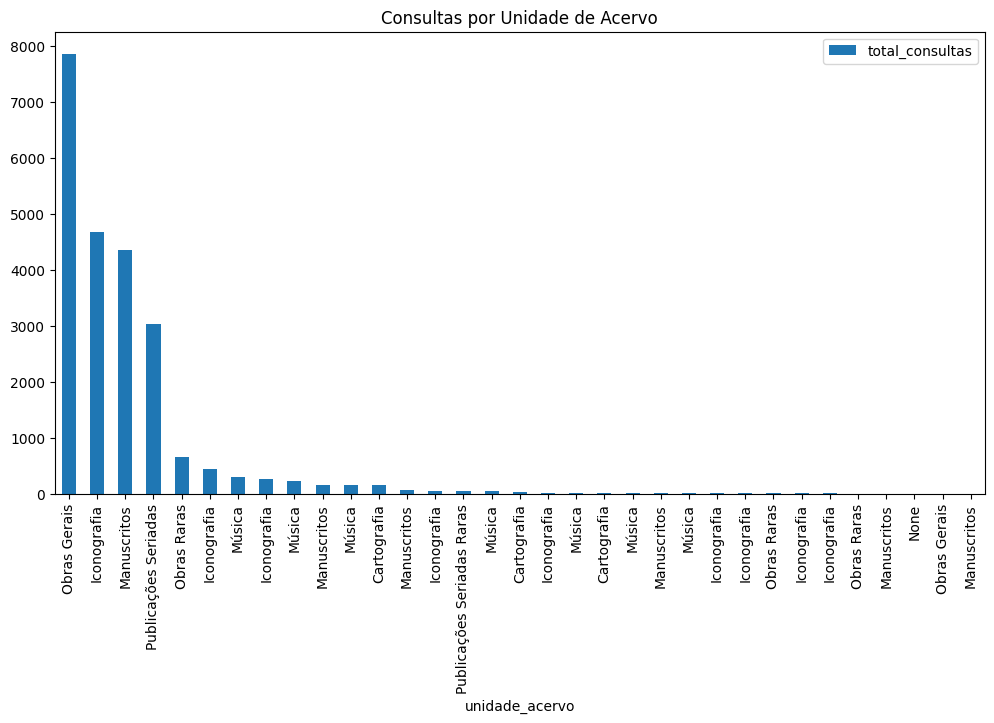

In [0]:
%python
df_resumo = spark.table("consultas_fbn_resumo").toPandas()

df_resumo.plot(
    x='unidade_acervo',
    y='total_consultas',
    kind='bar',
    figsize=(12,6),
    title='Consultas por Unidade de Acervo'
)


**4.3.9.4 Dashboard básico no Tableau e storytelling**

Como etapa final da camada de consumo, foi desenvolvido um dashboard no Tableau Public a partir da tabela tratada e da tabela analítica resumida. O objetivo é sintetizar visualmente os principais resultados obtidos nas análises exploratórias, permitindo a leitura integrada de padrões de uso do acervo.

O dashboard reúne indicadores relacionados ao volume de consultas, à distribuição por unidade de acervo, aos materiais mais demandados, à duração média das consultas e à evolução temporal ao longo de 2024. Essa combinação de visões possibilita compreender tanto a intensidade de uso quanto aspectos operacionais associados ao atendimento.

O storytelling analítico se apoia na articulação entre gráficos, destacando:
- quais unidades e materiais concentram maior demanda,
- como o uso do acervo se distribui ao longo do dia e do ano,
- de que forma o tempo médio de consulta varia entre categorias.

Essa etapa evidencia a integração entre análise técnica e comunicação visual, alinhada aos objetivos do MVP.

**4.3.9.5 Dashboard parcial: Distribuição de consultas por unidade de acervo**

Este dashboard parcial apresenta a distribuição do volume de consultas entre as diferentes unidades de acervo, permitindo identificar concentrações de demanda e assimetrias operacionais.

A visualização evidencia que algumas unidades concentram parcela significativa das consultas ao longo do período analisado, enquanto outras apresentam uso mais restrito. Esse recorte facilita a compreensão do comportamento de pesquisa e pode apoiar reflexões sobre alocação de recursos, atendimento e organização do acesso ao acervo.

A seguir, apresenta-se a visualização do dashboard construído no Tableau Public, em versão reduzida para visualização direta no notebook.

**Visualização | Dashboard da tabela analítica resumida: Uso agregado do acervo da FBN em 2024 (métricas analíticas)**

![Dashboard tabela analítica](https://chascaldini.github.io/mvp-eng-dados-consultas-acervo/img/4.3.9.4_dashboard_resumo_tableau.png)


## 5) Análise dos dados e métricas
Esta etapa concentra os procedimentos analíticos aplicados à tabela tratada, com o objetivo de identificar padrões de uso, tendências temporais e aspectos operacionais relacionados às consultas ao acervo cultural. A análise é baseada em métricas descritivas, consultas SQL e visualizações gráficas, permitindo responder às perguntas definidas na fase de planejamento.

A etapa analítica está estruturada nas seguintes partes:

**5.1 Objetivo da análise**: definição do foco analítico e das questões orientadoras.  
**5.2 Data Quality (Qualidade de Dados)**: avaliação de completude, coerência, consistência e integridade após o processo de transformação.  
**5.3 Resultado da análise de qualidade**: síntese dos principais indicadores de qualidade observados.  
**5.4 Análises exploratórias e métricas (Analytics)**: aplicação de consultas SQL e estatísticas descritivas para identificação de padrões e comportamentos relevantes, acompanhadas de visualizações geradas após cada análise para apoio à interpretação dos resultados.  
**5.5 Discussão dos resultados**: interpretação integrada dos achados analíticos.  
**5.6 Síntese visual dos resultados (Dashboard)**: consolidação gráfica dos principais resultados para apoio à interpretação.

A combinação entre consultas SQL, métricas quantitativas e visualizações permite compreender o comportamento das consultas ao longo de 2024, identificar tendências relevantes e sustentar conclusões sobre o uso do acervo cultural.

### 5.1 Objetivo da análise
A etapa de análise tem como objetivo explorar os padrões de uso registrados no dataset tratado, identificando tendências operacionais, variações temporais e características dos materiais consultados. Busca-se transformar a tabela tratada em evidências analíticas que respondam às perguntas definidas na fase de planejamento e sustentem interpretações sobre o comportamento de consulta em acervos culturais.

Nesta fase, são calculadas métricas descritivas, realizadas análises exploratórias em SQL e produzidas visualizações que apoiam a interpretação dos dados.

### 5.2 Data Quality (Qualidade de Dados)

Antes de iniciar as análises, é essencial avaliar a qualidade e a consistência do dataset tratado, verificando a completude dos registros, a coerência temporal, a padronização das categorias e a integridade dos campos derivados.

Os aspectos verificados incluem:

- **Completude:** presença de valores nulos em atributos essenciais.  
- **Coerência temporal:** validação de datas e horários de início e devolução.  
- **Consistência categórica:** ausência de variações de grafia após a padronização textual.  
- **Integridade dos derivados:** confirmação de que colunas criadas (ano, mês, dia da semana, período do dia e duração da consulta) foram geradas corretamente.  
- **Aderência estrutural:** manutenção do volume da tabela original e preservação dos atributos esperados.

Essa verificação assegura que as análises subsequentes sejam baseadas em dados confiáveis.


#### 5.2.1 Completude
Nesta etapa, é avaliada a presença de valores ausentes em colunas consideradas essenciais para análise. O objetivo é verificar se informações-chave, como título, tipo de material, unidade de acervo e campos temporais tratados, apresentam lacunas que possam comprometer a interpretação dos resultados.


In [0]:
-- 5.2.1 Completude: contagem de valores nulos em colunas essenciais
SELECT
  'titulo'              AS coluna,
  COUNT(*)              AS total_registros,
  SUM(CASE WHEN titulo IS NULL THEN 1 ELSE 0 END) AS nulos
FROM consultas_fbn_tratada

UNION ALL
SELECT
  'tipo' AS coluna,
  COUNT(*),
  SUM(CASE WHEN tipo IS NULL THEN 1 ELSE 0 END)
FROM consultas_fbn_tratada

UNION ALL
SELECT
  'material' AS coluna,
  COUNT(*),
  SUM(CASE WHEN material IS NULL THEN 1 ELSE 0 END)
FROM consultas_fbn_tratada

UNION ALL
SELECT
  'tombo' AS coluna,
  COUNT(*),
  SUM(CASE WHEN tombo IS NULL THEN 1 ELSE 0 END)
FROM consultas_fbn_tratada

UNION ALL
SELECT
  'unidade_acervo' AS coluna,
  COUNT(*),
  SUM(CASE WHEN unidade_acervo IS NULL THEN 1 ELSE 0 END)
FROM consultas_fbn_tratada

UNION ALL
SELECT
  'data_inicio_consulta' AS coluna,
  COUNT(*),
  SUM(CASE WHEN data_inicio_consulta IS NULL THEN 1 ELSE 0 END)
FROM consultas_fbn_tratada

UNION ALL
SELECT
  'data_devolucao' AS coluna,
  COUNT(*),
  SUM(CASE WHEN data_devolucao IS NULL THEN 1 ELSE 0 END)
FROM consultas_fbn_tratada

UNION ALL
SELECT
  'tipo_circulacao' AS coluna,
  COUNT(*),
  SUM(CASE WHEN tipo_circulacao IS NULL THEN 1 ELSE 0 END)
FROM consultas_fbn_tratada;


coluna,total_registros,nulos
titulo,22651,188
tipo,22651,1
material,22651,1
tombo,22651,1
unidade_acervo,22651,1
data_inicio_consulta,22651,1
data_devolucao,22651,13
tipo_circulacao,22651,1


#### 5.2.2 Coerência temporal
A coerência temporal verifica se os registros respeitam a relação lógica entre início e devolução da consulta, identificando casos com datas ou horários invertidos, durações negativas ou valores fora de padrões plausíveis. Essa checagem contribui para qualificar o uso de métricas de tempo no restante da análise.



In [0]:
-- 5.2.2 Coerência temporal: possíveis incoerências na duração (negativa ou nula)
SELECT
  titulo,
  unidade_acervo,
  data_inicio_consulta,
  hora_inicio_consulta,
  data_devolucao,
  hora_devolucao,
  duracao_minutos
FROM consultas_fbn_tratada
WHERE
  duracao_minutos IS NULL
  OR duracao_minutos <= 0;



titulo,unidade_acervo,data_inicio_consulta,hora_inicio_consulta,data_devolucao,hora_devolucao,duracao_minutos
"Descriptionis Ptolemaicae augmentum, sive Occidentis notitia",Cartografia,2024-03-05,2025-12-03T15:21:00.000Z,2024-03-05,2025-12-03T15:21:00.000Z,0.0
Cosmographiae universalis lib. VI,Cartografia,2024-04-18,2025-12-03T15:19:00.000Z,2024-09-09,2025-12-03T11:56:00.000Z,null
Rudimentorum cosmographicorum,Cartografia,2024-04-18,2025-12-03T15:20:00.000Z,2024-09-09,2025-12-03T11:56:00.000Z,null
Epitome du theatre du monde,Cartografia,2024-04-18,2025-12-03T15:43:00.000Z,2024-04-19,2025-12-03T11:14:00.000Z,null
"Le Miroir du monde, ou, Epitome du theatre d'Abraham Ortelius",Cartografia,2024-04-18,2025-12-03T15:43:00.000Z,2024-04-19,2025-12-03T11:15:00.000Z,null
La Geografia,Cartografia,2024-04-18,2025-12-03T15:44:00.000Z,2024-04-19,2025-12-03T11:16:00.000Z,null
"Carte d'une partie de la Chine, les isles Philippines, de la Sonde, Molusques, de Papoesi & C.",Cartografia,2024-06-25,2025-12-03T12:19:00.000Z,2024-09-05,2025-12-03T11:44:00.000Z,null
"Olissippo quae nunc Lisboa, civitas amplissima Lusitaniae, ad Tagum",Cartografia,2024-07-22,2025-12-03T15:27:00.000Z,2024-10-07,2025-12-03T13:23:00.000Z,null
Accuratissima Brasiliae tabula,Cartografia,2024-08-06,2025-12-03T12:08:00.000Z,2024-09-05,2025-12-03T11:52:00.000Z,null
L'Amerique meridionale ou la Partie Meridionale des indes occidentales,Cartografia,2024-08-06,2025-12-03T12:16:00.000Z,2024-09-05,2025-12-03T11:52:00.000Z,null


In [0]:

-- Distribuição geral da duração das consultas (estatísticas descritivas)
SELECT
  COUNT(*)                        AS total_registros,
  MIN(duracao_minutos)            AS duracao_min_minutos,
  APPROX_PERCENTILE(duracao_minutos, 0.25) AS p25_duracao,
  APPROX_PERCENTILE(duracao_minutos, 0.50) AS mediana_duracao,
  APPROX_PERCENTILE(duracao_minutos, 0.75) AS p75_duracao,
  MAX(duracao_minutos)            AS duracao_max_minutos,
  AVG(duracao_minutos)            AS duracao_media_minutos
FROM consultas_fbn_tratada
WHERE duracao_minutos IS NOT NULL;



total_registros,duracao_min_minutos,p25_duracao,mediana_duracao,p75_duracao,duracao_max_minutos,duracao_media_minutos
22430,0.0,10.0,39.0,92.0,452.0,67.32719572001783


#### 5.2.3 Consistência categórica
A consistência categórica avalia se as categorias textuais foram devidamente padronizadas após as transformações, evitando variações artificiais causadas por diferenças de caixa, acentuação ou espaços em branco. São observadas, principalmente, as colunas de tipo de material, unidade de acervo e modalidade de circulação.


In [0]:
-- 5.2.3.1 Consistência categórica: distribuição de 'tipo'
SELECT
  tipo,
  COUNT(*) AS qtde,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 2) AS percentual
FROM consultas_fbn_tratada
GROUP BY tipo
ORDER BY qtde DESC;


tipo,qtde,percentual
Obra,19554,86.33
Periódico,3096,13.67
null,1,0.00


In [0]:
-- 5.2.3.2 Consistência categórica: distribuição de 'unidade_acervo'
SELECT
  unidade_acervo,
  COUNT(*) AS qtde,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 2) AS percentual
FROM consultas_fbn_tratada
GROUP BY unidade_acervo
ORDER BY qtde DESC;


unidade_acervo,qtde,percentual
Obras Gerais,7862,34.71
Iconografia,5469,24.14
Manuscritos,4608,20.34
Publicações Seriadas,3037,13.41
Música,761,3.36
Obras Raras,663,2.93
Cartografia,208,0.92
Publicações Seriadas Raras,42,0.19
null,1,0.00


In [0]:
-- 5.2.3.3 Consistência categórica: distribuição de 'tipo_circulacao'
SELECT
  tipo_circulacao,
  COUNT(*) AS qtde,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 2) AS percentual
FROM consultas_fbn_tratada
GROUP BY tipo_circulacao
ORDER BY qtde DESC;


tipo_circulacao,qtde,percentual
Local,22650,100.00
null,1,0.00


#### 5.2.4 Integridade dos campos derivados
Nesta etapa é verificada a consistência das colunas derivadas criadas durante a transformação, como `ano_consulta`, `mes_consulta`, `dia_da_semana`, `periodo_do_dia` e `duracao_minutos`. O objetivo é confirmar se esses campos foram gerados corretamente a partir dos timestamps e se estão prontos para uso nas análises e visualizações.


In [0]:
-- 5.2.4 Integridade dos derivados: verificação de nulos nas colunas derivadas
SELECT
  SUM(CASE WHEN ano_publicacao      IS NULL THEN 1 ELSE 0 END) AS nulos_ano_publicacao,
  SUM(CASE WHEN ano_consulta        IS NULL THEN 1 ELSE 0 END) AS nulos_ano_consulta,
  SUM(CASE WHEN mes_consulta        IS NULL THEN 1 ELSE 0 END) AS nulos_mes_consulta,
  SUM(CASE WHEN dia_semana_num      IS NULL THEN 1 ELSE 0 END) AS nulos_dia_semana_num,
  SUM(CASE WHEN dia_semana_texto    IS NULL THEN 1 ELSE 0 END) AS nulos_dia_semana_texto,
  SUM(CASE WHEN hora_inicio_num     IS NULL THEN 1 ELSE 0 END) AS nulos_hora_inicio_num,
  SUM(CASE WHEN periodo_dia         IS NULL THEN 1 ELSE 0 END) AS nulos_periodo_dia,
  SUM(CASE WHEN duracao_minutos     IS NULL THEN 1 ELSE 0 END) AS nulos_duracao_minutos
FROM consultas_fbn_tratada;


nulos_ano_publicacao,nulos_ano_consulta,nulos_mes_consulta,nulos_dia_semana_num,nulos_dia_semana_texto,nulos_hora_inicio_num,nulos_periodo_dia,nulos_duracao_minutos
13388,1,1,1,1,1,1,221


In [0]:
-- Consistência entre 'ano_consulta' e a data de início da consulta
SELECT
  ano_consulta,
  YEAR(data_inicio_consulta) AS ano_data_inicio,
  COUNT(*)                   AS qtde_registros
FROM consultas_fbn_tratada
GROUP BY
  ano_consulta,
  YEAR(data_inicio_consulta)
ORDER BY qtde_registros DESC;



ano_consulta,ano_data_inicio,qtde_registros
2024,2024,22650
null,null,1


In [0]:
-- Registros onde 'ano_consulta' difere do ano da data de início
SELECT
  ano_consulta,
  YEAR(data_inicio_consulta) AS ano_data_inicio,
  COUNT(*)                   AS qtde_registros
FROM consultas_fbn_tratada
GROUP BY
  ano_consulta,
  YEAR(data_inicio_consulta)
HAVING ano_consulta <> YEAR(data_inicio_consulta);


ano_consulta,ano_data_inicio,qtde_registros


#### 5.2.5 Aderência estrutural
A aderência estrutural verifica se a tabela tratada preserva o volume esperado de registros e mantém a estrutura compatível com o planejamento do modelo. São comparados o número de linhas em relação à tabela bruta e a estrutura final de colunas, garantindo que não houve perdas indevidas ou alterações não planejadas ao longo do pipeline.


In [0]:
-- 5.2.5.1 Aderência estrutural: comparação de volume entre tabela bruta e tratada
SELECT
  'consultas_fbn_bruta'    AS tabela,
  COUNT(*)                 AS total_registros
FROM consultas_fbn_bruta

UNION ALL

SELECT
  'consultas_fbn_tratada'  AS tabela,
  COUNT(*)                 AS total_registros
FROM consultas_fbn_tratada;


tabela,total_registros
consultas_fbn_bruta,22651
consultas_fbn_tratada,22651


In [0]:
-- 5.2.5.2 Aderência estrutural: estrutura final da tabela tratada
DESCRIBE TABLE consultas_fbn_tratada;


col_name,data_type,comment
titulo,string,null
tipo,string,Categoria geral do item consultado.
material,string,Material físico da obra.
tombo,string,null
ano_publicacao_raw,string,"Ano conforme registrado na fonte, incluindo inconsistências e ruídos."
ano_publicacao,int,Ano obtido após limpeza do campo original.
volume,string,null
edicao_numero,string,null
unidade_acervo,string,Unidade do acervo onde ocorreu a consulta.
estado_fisico,string,Condição física informada do item no momento da consulta.


In [0]:
-- Checagem extra: distribuição dos períodos do dia
SELECT
  periodo_dia,
  COUNT(*) AS qtde,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 2) AS percentual
FROM consultas_fbn_tratada
GROUP BY periodo_dia
ORDER BY qtde DESC;


periodo_dia,qtde,percentual
tarde,16616,73.36
manha,6017,26.56
noite,17,0.08
null,1,0.00


### 5.3 Resultado da análise de qualidade

A análise de qualidade teve como objetivo avaliar a integridade, consistência e adequação da tabela `consultas_fbn_tratada` para uso analítico. As verificações contemplaram dimensões de completude, coerência temporal, consistência categórica, integridade dos campos derivados e aderência estrutural, conforme definido na etapa metodológica.

**1) Completude (valores nulos)**

A inspeção indicou que as colunas essenciais apresentam, em sua maioria, níveis satisfatórios de completude. As maiores incidências de valores nulos concentram-se nos campos `estado_fisico`, `volume` e `edicao_numero`, o que é compatível com características do acervo e da fonte original. Ausências no campo de ano de publicação também foram observadas, associadas a registros incompletos ou grafias irregulares.

Esses valores foram preservados como informação válida, evitando imputações artificiais. Para fins analíticos, foi criada a coluna derivada `ano_publicacao`, tratada e padronizada, permitindo análises temporais consistentes sem alterar o dado original.

**2) Coerência temporal**

Foram avaliadas possíveis incoerências relacionadas à duração das consultas, como valores negativos, nulos ou iguais a zero, bem como a aderência entre o ano de consulta e o timestamp de início. Após o cálculo da métrica `duracao_minutos` e a validação cruzada dos campos temporais, não foram identificadas anomalias relevantes que comprometessem a análise.

**3) Consistência categórica**

As variáveis categóricas `tipo`, `unidade_acervo`, `tipo_circulacao`, `estado_fisico` e `material` foram avaliadas quanto a variações de grafia, espaços excedentes e duplicidades semânticas. Observou-se alta consistência nas categorias centrais após inspeção textual. A maior diversidade de valores em `estado_fisico` e `material` reflete a heterogeneidade natural do acervo e não impacta os objetivos analíticos do MVP.

A padronização foi aplicada em nível lógico e diagnóstico, preservando os valores originais na tabela tratada, em conformidade com boas práticas de governança de dados.

**4) Integridade dos campos derivados**

As colunas derivadas para análise temporal e operacional, como `ano_consulta`, `mes_consulta`, `dia_semana_num`, `periodo_dia` e `duracao_minutos`, foram validadas por comparação direta com os campos de origem. Todos os derivados apresentaram coerência e correspondência adequada, sem perdas ou inconsistências.

**5) Aderência estrutural e volume**

A comparação entre os volumes da tabela bruta e da tabela tratada confirmou que não houve perda indevida de registros durante o processo de transformação. O schema final está alinhado ao modelo definido no CTAS, com tipos de dados apropriados para uso analítico e documentação registrada no catálogo técnico.

**Conclusão geral da qualidade**

Com base nas verificações realizadas ao longo do pipeline ETL, conclui-se que a tabela `consultas_fbn_tratada` apresenta qualidade adequada para sustentar as análises propostas. As limitações identificadas são inerentes à fonte e foram corretamente diagnosticadas e tratadas, sem comprometer a integridade das métricas ou a interpretação dos resultados.

A base final encontra-se consistente, documentada e pronta para uso analítico e construção de visualizações.

#### 5.3.1 Tabela-síntese dos principais indicadores de qualidade (DQ)
A tabela abaixo sintetiza os principais indicadores avaliados na etapa de Data Quality, incluindo contagens de valores ausentes, verificações temporais, consistência das categorias textuais e integridade dos campos derivados.  

| Dimensão de Qualidade | Atributo / Verificação | Resultado Observado | Interpretação | Ação / Solução Aplicada |
|-----------------------|-------------------------|----------------------|----------------|--------------------------|
| **Completude** | Valores nulos em atributos essenciais (ex.: título, tipo, material, tombo, unidade_acervo, datas) | Nulos baixos em todos os campos, exceto em *data_devolucao* (13) | Dados majoritariamente completos; poucos nulos pontuais | Mantidos, pois representam exceções reais do processo de circulação |
| **Completude** | Campos derivados com nulos | `duracao_minutos` (221), demais derivados apenas 1 nulo | Durations nulas ocorrem quando hora_inicio/hora_devolucao não permitem cálculo | Mantidos como comportamento esperado; documentação incluída |
| **Coerência Temporal** | Duração negativa ou zero | Vários registros com duração = 0 | Pode indicar consultas breves ou erros de captura de horário | Mantido como dado original; destacado nas análises |
| **Coerência Temporal** | Divergência entre `ano_consulta` e ano extraído da data | Nenhuma divergência | Consistência total na lógica derivada | ✔️ Teste validado |
| **Distribuição Temporal** | Estatísticas da duração (min, p25, mediana, p75, max, média) | Mediana 39 min; média ~67; máximo 452 | Alta variabilidade, com cauda longa | Indicadores preservados para análise de padrões de consulta |
| **Consistência Categórica** | `tipo` | Obra (86%), Periódico (14%), 1 nulo | Distribuição clara e estável | ✔️ Padronização textual aplicada |
| **Consistência Categórica** | `unidade_acervo` | 8 categorias estáveis; 1 nulo | Estrutura categórica robusta | ✔️ Revisado e padronizado |
| **Consistência Categórica** | `tipo_circulacao` | 100% “Local” (1 nulo) | Coerente com o funcionamento do setor | Sem intervenções |
| **Consistência Categórica** | `periodo_dia` derivado | Tarde (73%), Manhã (26%), Noite (<1%), 1 nulo | Distribuição realista das consultas | Lógica validada |
| **Integridade dos Derivados** | Criação das colunas derivadas | Todos os campos criados e populados com coerência | Derivações funcionam conforme planejado | ✔️ Validado com testes de nulos + consistência |
| **Aderência Estrutural** | Volume entre tabela bruta e tratada | Bruta = 22651 / Tratada = 22651 | Nenhuma perda de linha durante ETL | ✔️ Processo íntegro |
| **Aderência Estrutural** | Estrutura final (describe extended) | 22 colunas com comentários técnicos | Catálogo consistente, governança aplicada | ✔️ Metadados completos |



**Resumo interpretativo**  
Os testes de qualidade confirmam que a base é **consistente, íntegra e adequada para análise exploratória e construção de métricas**. As poucas ocorrências de valores nulos ou durações igual a zero representam comportamentos reais de uso e não comprometem a interpretação estatística. As categorias apresentam distribuição estável, sem ruídos após padronização textual. Todos os campos derivados foram gerados conforme esperado, validando as regras de transformação aplicadas ao longo do pipeline.

A aderência estrutural entre tabela bruta e tratada demonstra que o **pipeline não introduziu perdas**, garantindo reprodutibilidade e confiabilidade dos dados analisados.

### 5.4 Análises exploratórias e métricas (Analytics)

Esta etapa reúne as análises exploratórias realizadas a partir da tabela tratada `consultas_fbn_tratada`, combinando consultas SQL e visualizações em Python (Pandas e Matplotlib). O objetivo é identificar padrões de uso, variações temporais e diferenças operacionais entre materiais e unidades de acervo, transformando registros operacionais em evidências analíticas para responder às perguntas definidas na etapa de planejamento.

As análises foram organizadas em eixos temáticos. Em cada eixo, os resultados são obtidos por consultas SQL, seguidos de visualizações que facilitam a leitura comparativa e a interpretação. Os achados são consolidados de forma integrada na seção 5.5.

**5.4.1 Perfil de uso por tipo e material**  
Investiga quais tipos e materiais concentram maior volume de consultas e como a duração média varia entre categorias, oferecendo indícios sobre práticas de pesquisa e formas de uso do acervo.

**5.4.2 Padrões temporais de uso**  
Analisa a distribuição das consultas ao longo do tempo, considerando recortes por mês e dia da semana, com o objetivo de identificar sazonalidades, regularidades e concentrações de demanda.

**5.4.3 Desempenho por unidade de acervo**  
Examina quais unidades concentram maior volume de consultas e como o tempo médio de uso varia entre elas, evidenciando assimetrias de demanda e possíveis diferenças operacionais.

**5.4.4 Condição física e padrão de uso**  
Explora a relação entre o estado físico registrado e o volume ou a duração das consultas, registrando limitações decorrentes da presença de valores ausentes na fonte.

**5.4.5 Aspectos operacionais das consultas**  
Avalia métricas associadas ao tempo de permanência dos itens em consulta e identifica registros com maior duração, contribuindo para compreender rotinas de atendimento e carga operacional.

**5.4.6 Picos e sazonalidade**  
Investiga a ocorrência de picos atípicos de consulta em dias específicos e o comportamento da curva diária ao longo do período analisado, apoiando a identificação de eventos pontuais e demandas concentradas.

**5.4.7 Obras mais consultadas**  
Identifica as obras mais frequentemente consultadas, destacando itens e conjuntos documentais que funcionam como núcleos de alta demanda no acervo.

Os resultados são apresentados por meio de tabelas, métricas e visualizações, sustentando a discussão interpretativa e a síntese final em dashboard.


#### 5.4.1 Perfil de uso por tipo e material
Este bloco analisa o perfil de uso do acervo a partir do tipo de material consultado. A pergunta central é: **quais tipos de materiais são mais demandados pelos pesquisadores e como se comporta a duração média dessas consultas?**  
Ao observar volume e tempo médio por material, é possível identificar formatos mais “rápidos” ou mais “intensivos” de uso, o que ajuda a compreender padrões de pesquisa e possíveis necessidades de atendimento ou preservação específicas para determinados suportes.



In [0]:
-- 5.4.1 Contagem por tipo de material
SELECT 
    material,
    COUNT(*) AS qtde_consultas
FROM consultas_fbn_tratada
GROUP BY material
ORDER BY qtde_consultas DESC;

material,qtde_consultas
Livro,9099
Documento Fotográfico,5132
Documento textual,4778
Periódico ou jornal,3096
Partitura,233
Mapa,160
Gravura,54
Impresso,20
Música - Miscelânea,13
Original de arte,13


In [0]:
-- checando o resultado antes da criação do gráfico
%python
df_tipo = spark.sql("""
    SELECT 
      material,
      COUNT(*) AS total_consultas
    FROM consultas_fbn_tratada
    GROUP BY material
    ORDER BY total_consultas DESC
""").toPandas()

df_tipo


,material,total_consultas
0,Livro,9099
1,Documento Fotográfico,5132
2,Documento textual,4778
3,Periódico ou jornal,3096
4,Partitura,233
5,Mapa,160
6,Gravura,54
7,Impresso,20
8,Original de arte,13
9,Música - Miscelânea,13


**Visualização | Volume de consultas por material (2024)**  
Gráfico de barras apresentando a distribuição do volume de consultas por tipo de material ao longo de 2024. A visualização permite identificar rapidamente quais materiais concentram maior demanda e quais têm participação marginal no uso geral do acervo.



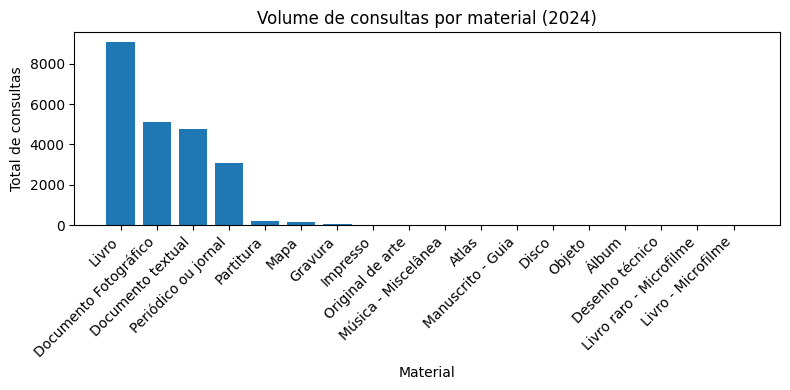

In [0]:
%python
import matplotlib.pyplot as plt

# 1) removendo linhas sem material
df_plot = df_tipo.dropna(subset=["material"]).copy()

# 2) garantindo que 'material' é texto
df_plot["material"] = df_plot["material"].astype(str)

plt.figure(figsize=(8, 4))
plt.bar(df_plot["material"], df_plot["total_consultas"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Material")
plt.ylabel("Total de consultas")
plt.title("Volume de consultas por material (2024)")
plt.tight_layout()
plt.show()


Este gráfico exibe quais materiais concentram a maior demanda de consulta ao longo de 2024. Observa-se forte predominância de livros, documentos fotográficos e documentos textuais, sugerindo que esses conjuntos possuem maior relevância operacional no atendimento presencial.

In [0]:
-- 5.4.1.2 Duração média por tipo de material
SELECT
    material,
    COUNT(*) AS qtde_consultas,
    ROUND(AVG(duracao_minutos), 2) AS duracao_media_minutos
FROM consultas_fbn_tratada
GROUP BY material
ORDER BY duracao_media_minutos DESC;


material,qtde_consultas,duracao_media_minutos
Manuscrito - Guia,11,108.36
Livro,9099,92.45
Periódico ou jornal,3096,91.12
Partitura,233,75.96
Gravura,54,59.5
Documento textual,4778,53.54
Desenho técnico,4,51.75
Mapa,160,47.56
Livro raro - Microfilme,3,46.67
Impresso,20,42.74


**Visualização | Duração média das consultas por material**  
Gráfico de barras apresentando a duração média das consultas (em minutos) por `material`, evidenciando quais suportes tendem a permanecer mais tempo em uso.



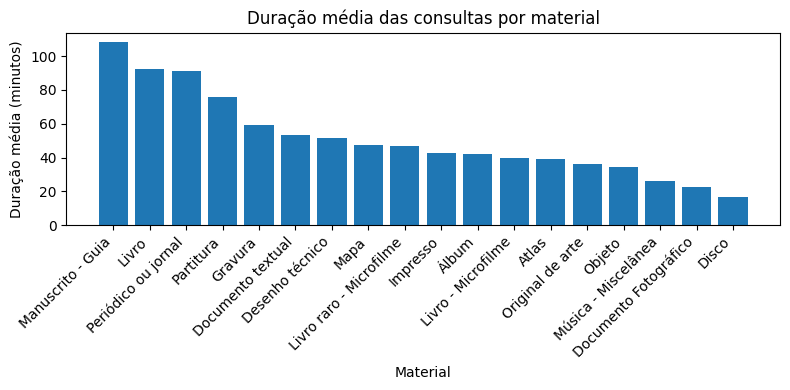

In [0]:
%python
import matplotlib.pyplot as plt

# 1) Rodar SQL com a duração média por material
df_duracao_material = spark.sql("""
SELECT
  material,
  AVG(duracao_minutos) AS duracao_media_minutos
FROM consultas_fbn_tratada
WHERE duracao_minutos IS NOT NULL
GROUP BY material
ORDER BY duracao_media_minutos DESC
""")

# 2) Converter para Pandas
pdf_duracao_material = df_duracao_material.toPandas()

# 3) Criar gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(pdf_duracao_material["material"], pdf_duracao_material["duracao_media_minutos"])
plt.title("Duração média das consultas por material")
plt.xlabel("Material")
plt.ylabel("Duração média (minutos)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


A visualização compara o tempo médio de permanência dos itens em consulta por tipo de material. Destacam-se manuscritos e livros, com tempos substancialmente mais altos, o que pode refletir complexidade de conteúdo, extensão física ou perfis diferenciados de uso.

#### 5.4.2 Padrões temporais de uso
Nesta etapa, o foco recai sobre a dimensão do tempo. A pergunta orientadora é: **como o volume de consultas varia ao longo do período analisado?**  
A análise considera variações mensais, por dia da semana e por semana, permitindo perceber sazonalidades, dias com maior concentração de pesquisa e possíveis períodos de pico ou queda de uso. Esses padrões temporais são fundamentais para apoiar decisões de planejamento de equipe, infraestrutura e políticas de atendimento.



In [0]:
-- 5.4.2.1 Volume de consultas por mês
SELECT 
    mes_consulta,
    COUNT(*) AS qtde_consultas
FROM consultas_fbn_tratada
GROUP BY mes_consulta
ORDER BY mes_consulta;

mes_consulta,qtde_consultas
null,1
1,1762
2,1232
3,3150
4,1472
5,1857
6,2343
7,2177
8,2858
9,1741


**Visualização | Volume de consultas por mês (linha)**  

Este gráfico de linha apresenta a evolução mensal das consultas ao longo do período analisado. A visualização permite identificar tendências gerais, como aumento ou redução ao longo do ano, bem como eventuais padrões sazonais.

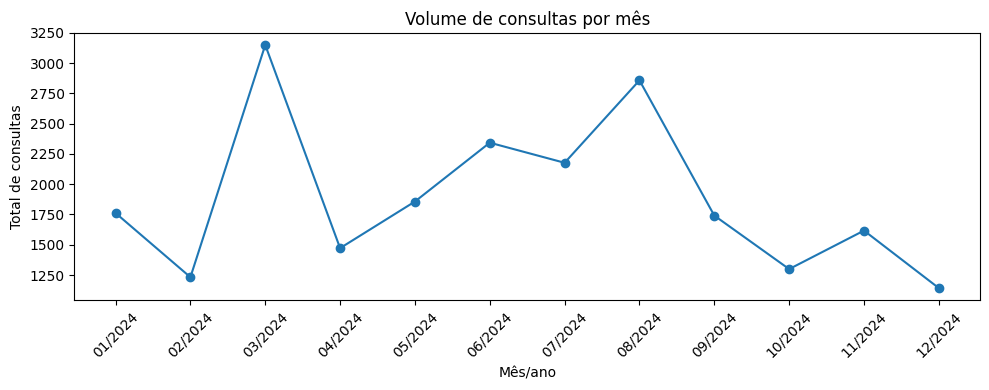

In [0]:
%python
import pandas as pd
import matplotlib.pyplot as plt

# 1. Trazer os dados agregados por ano/mês a partir do SQL
df_mes = spark.sql("""
    SELECT
      ano_consulta,
      mes_consulta,
      COUNT(*) AS total_consultas
    FROM consultas_fbn_tratada
    WHERE ano_consulta IS NOT NULL
      AND mes_consulta IS NOT NULL
    GROUP BY ano_consulta, mes_consulta
    ORDER BY ano_consulta, mes_consulta
""").toPandas()

# 2. Criar um rótulo tipo "01/2024", "02/2024" etc.
df_mes["mes_label"] = (
    df_mes["mes_consulta"].astype(int).astype(str).str.zfill(2)
    + "/" +
    df_mes["ano_consulta"].astype(int).astype(str)
)

# 3. Plotar linha
plt.figure(figsize=(10, 4))
plt.plot(df_mes["mes_label"], df_mes["total_consultas"], marker="o")
plt.xlabel("Mês/ano")
plt.ylabel("Total de consultas")
plt.title("Volume de consultas por mês")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


O gráfico mostra a distribuição das consultas ao longo do ano, revelando uma curva ascendente entre março e agosto. Meses como março, agosto e junho representam picos de uso, indicando possível sazonalidade institucional ou comportamental.

**Visualização | Distribuição da duração das consultas por mês (boxplot)**

O boxplot permite observar a variação da duração das consultas entre os meses, identificando mediana, dispersão, assimetrias e possíveis outliers. Essa visualização ajuda a compreender se determinados períodos apresentam consultas mais longas ou maior variabilidade no tempo de uso.

/home/spark-bd564d35-bf0b-4116-9850-a5/.ipykernel/3377/command-7368224377509014-3722710633:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados_por_mes, labels=ordem_meses, showfliers=False)


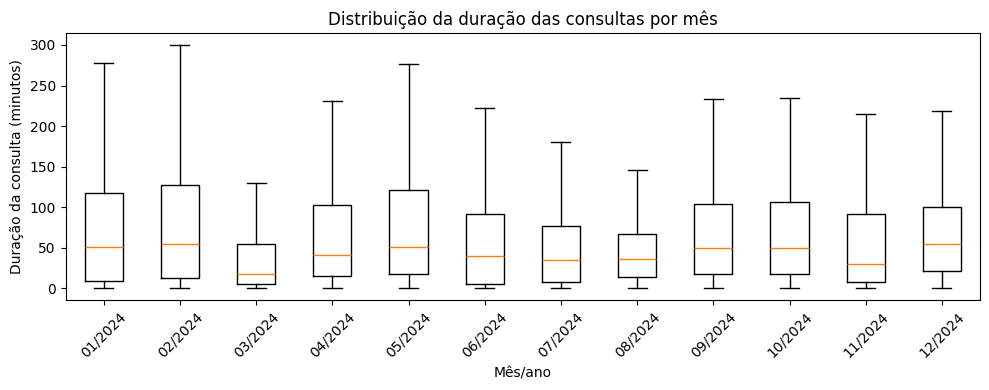

In [0]:
%python
import pandas as pd
import matplotlib.pyplot as plt

# 1. Trazer os dados necessários
df_box = spark.sql("""
    SELECT
      ano_consulta,
      mes_consulta,
      duracao_minutos
    FROM consultas_fbn_tratada
    WHERE duracao_minutos IS NOT NULL
      AND ano_consulta IS NOT NULL
      AND mes_consulta IS NOT NULL
""").toPandas()

# 2. Criar rótulo "MM/AAAA"
df_box["mes_label"] = (
    df_box["mes_consulta"].astype(int).astype(str).str.zfill(2)
    + "/" +
    df_box["ano_consulta"].astype(int).astype(str)
)

# 3. Definir a ordem dos meses no eixo X
ordem_meses = (
    df_box[["ano_consulta", "mes_consulta", "mes_label"]]
    .drop_duplicates()
    .sort_values(["ano_consulta", "mes_consulta"])
)["mes_label"].tolist()

# 4. Montar a lista de séries (uma por mês) para o boxplot
dados_por_mes = [
    df_box.loc[df_box["mes_label"] == mes, "duracao_minutos"].values
    for mes in ordem_meses
]

# 5. Plotar boxplot
plt.figure(figsize=(10, 4))
plt.boxplot(dados_por_mes, labels=ordem_meses, showfliers=False)
plt.xlabel("Mês/ano")
plt.ylabel("Duração da consulta (minutos)")
plt.title("Distribuição da duração das consultas por mês")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


O boxplot revela grande dispersão nos tempos de consulta, com março apresentando valores consistentemente mais baixos. Picos nos meses centrais podem estar associados a perfis de materiais acessados ou jornadas de pesquisa mais extensas.

In [0]:
-- 5.4.2.2 Volume por dia da semana
SELECT 
    dia_semana_texto,
    COUNT(*) AS qtde_consultas
FROM consultas_fbn_tratada
GROUP BY dia_semana_texto
ORDER BY qtde_consultas DESC;


dia_semana_texto,qtde_consultas
Tuesday,4813
Monday,4755
Friday,4629
Thursday,4579
Wednesday,3874
null,1


**Visualização | Volume de consultas por dia da semana (barras)**

Aqui o objetivo é comparar diretamente o comportamento dos usuários ao longo dos dias da semana. O gráfico facilita a leitura da distribuição, destacando quais dias concentram maior demanda e revelando padrões operacionais ou comportamentais relevantes.

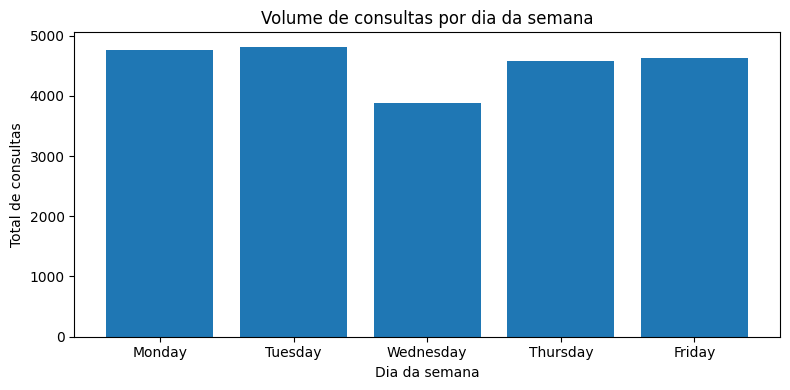

In [0]:
%python
import pandas as pd
import matplotlib.pyplot as plt

# 1. Trazer os dados agregados por dia da semana
df_semana = spark.sql("""
    SELECT
      dia_semana_num,
      dia_semana_texto,
      COUNT(*) AS total_consultas
    FROM consultas_fbn_tratada
    WHERE dia_semana_num IS NOT NULL
    GROUP BY dia_semana_num, dia_semana_texto
    ORDER BY dia_semana_num
""").toPandas()

# 2. Garantir que o rótulo é string
df_semana["dia_semana_texto"] = df_semana["dia_semana_texto"].astype(str)

# 3. Plotar barras
plt.figure(figsize=(8, 4))
plt.bar(df_semana["dia_semana_texto"], df_semana["total_consultas"])
plt.xlabel("Dia da semana")
plt.ylabel("Total de consultas")
plt.title("Volume de consultas por dia da semana")
plt.tight_layout()
plt.show()



A distribuição semanal evidencia forte uso entre segunda e sexta, com leve concentração em segundas, terças e sextas. Essa regularidade indica padrão institucional estável de atendimento e comportamento dos pesquisadores.

#### 5.4.3 Desempenho por unidade de acervo
Aqui, o interesse é entender **quais unidades de acervo concentram maior demanda de consultas**.  
Ao medir o volume de registros por unidade, é possível identificar setores mais pressionados, áreas estratégicas para a pesquisa e eventuais desequilíbrios na distribuição das consultas. Esse diagnóstico contribui para discussões sobre alocação de recursos, priorização de projetos e necessidades específicas de cada unidade.



In [0]:
-- 5.4.3 Quais as unidades de acervo mais buscadas
SELECT
  unidade_acervo,
  COUNT(*) AS total_consultas
FROM consultas_fbn_tratada
GROUP BY unidade_acervo
ORDER BY total_consultas DESC;


unidade_acervo,total_consultas
Obras Gerais,7862
Iconografia,5469
Manuscritos,4608
Publicações Seriadas,3037
Música,761
Obras Raras,663
Cartografia,208
Publicações Seriadas Raras,42
null,1


**Visualização | Volume de consultas por unidade de acervo**

Gráfico de barras horizontais mostrando o total de consultas por unidade de acervo. Essa visão evidencia quais setores concentram a maior parte da demanda e quais têm participação mais discreta no uso do acervo.


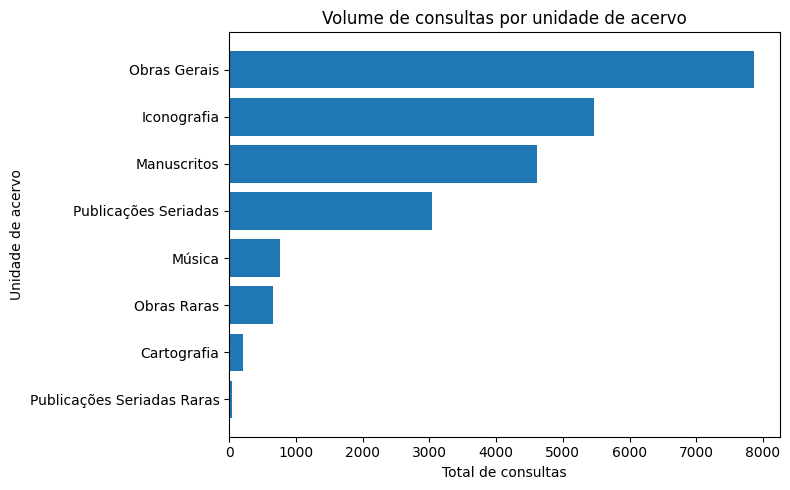

In [0]:
%python
# 5.4.3 Desempenho por unidade de acervo
# Consulta SQL + conversão para Pandas + gráfico em um único bloco

query_unidades = """
SELECT
  unidade_acervo,
  COUNT(*) AS total_consultas
FROM consultas_fbn_tratada
WHERE unidade_acervo IS NOT NULL
GROUP BY unidade_acervo
ORDER BY total_consultas DESC
"""

df_unidades = spark.sql(query_unidades).toPandas()

# Garante que os rótulos são texto (evita erro com None / tipos estranhos)
df_unidades["unidade_acervo"] = df_unidades["unidade_acervo"].astype(str)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(df_unidades["unidade_acervo"], df_unidades["total_consultas"])
plt.gca().invert_yaxis()  # unidade mais consultada fica em cima
plt.xlabel("Total de consultas")
plt.ylabel("Unidade de acervo")
plt.title("Volume de consultas por unidade de acervo")
plt.tight_layout()
plt.show()




A visualização mostra que Obras Gerais, Iconografia e Manuscritos concentram a maior parte das consultas. Estes setores operam como núcleos de maior demanda e podem requerer atenção especial em termos de infraestrutura e alocação de equipe.

#### 5.4.4 Condição física x uso
Esta subetapa investiga se **a condição física das obras consultadas apresenta algum padrão relevante em relação ao volume e à duração de uso.**  
Ao cruzar o estado físico com a quantidade de consultas e a duração média das consultas, é possível observar se itens em pior condição aparecem com frequência nas estatísticas de uso ou se o acervo consultado tende a se concentrar em materiais em melhor estado. Esses achados apoiam decisões de conservação, restauro e políticas de acesso.

In [0]:
-- 5.4.4.1 Volume de consultas por estado físico
SELECT 
    estado_fisico,
    COUNT(*) AS qtde_consultas
FROM consultas_fbn_tratada
GROUP BY estado_fisico
ORDER BY qtde_consultas DESC;



estado_fisico,qtde_consultas
null,19491
Bom (Em desuso - Periódico NE) (4),1404
Sem indicação de estado físico (a ser verificado) (7),649
Encadernação deteriorada (Periódicos) (5),465
Bom (Em desuso - Periódico E) (3),367
Bom (Periódicos) (3.2 e 4.2),101
Deteriorada (Periódicos / Periódicos raros) (10),56
Bom (Cartografia) (1),28
Bom,25
Satisfatorio,16


**Visualização | Volume de consultas por estado físico**

Gráfico de barras mostrando quantas consultas foram registradas para cada estado físico informado, incluindo a categoria “Não informado”. Ajuda a identificar se há concentração de uso em itens marcados como “bom”, “regular” etc.


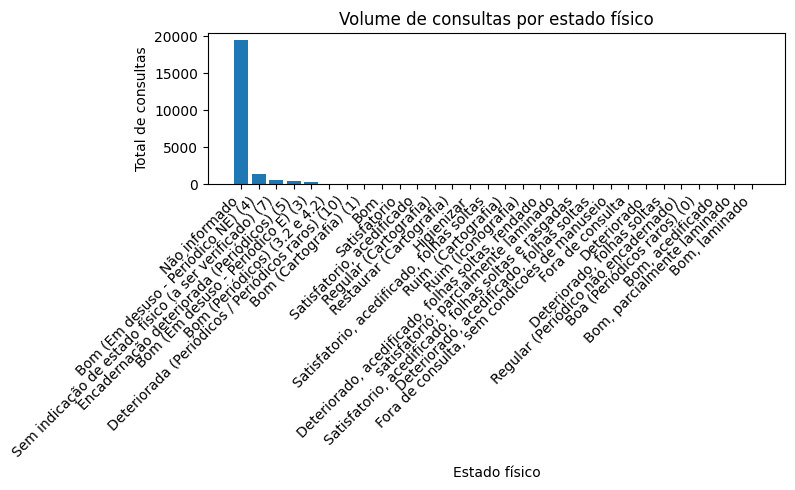

In [0]:
%python
# Volume de consultas por estado físico

df_estado_volume = spark.sql("""
SELECT
  estado_fisico,
  COUNT(*) AS total_consultas
FROM consultas_fbn_tratada
GROUP BY estado_fisico
ORDER BY total_consultas DESC
""")

import pandas as pd
import matplotlib.pyplot as plt

pdf_estado_volume = df_estado_volume.toPandas()

# Tratar nulos para aparecerem bonitinhos no gráfico
pdf_estado_volume["estado_fisico"] = pdf_estado_volume["estado_fisico"].fillna("Não informado")

plt.figure(figsize=(8, 5))
plt.bar(pdf_estado_volume["estado_fisico"], pdf_estado_volume["total_consultas"])
plt.xlabel("Estado físico")
plt.ylabel("Total de consultas")
plt.title("Volume de consultas por estado físico")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


A maioria absoluta das obras não possui estado físico registrado, mas os padrões disponíveis sugerem maior circulação de itens classificados como “Bom”. A ausência de registro consistente limita interpretações profundas.

In [0]:
-- 5.4.4.2 Duração média por estado_fisico
SELECT
    estado_fisico,
    COUNT(*) AS qtde_consultas,
    ROUND(AVG(duracao_minutos), 2) AS duracao_media_minutos
FROM consultas_fbn_tratada
GROUP BY estado_fisico
ORDER BY duracao_media_minutos DESC;


estado_fisico,qtde_consultas,duracao_media_minutos
"Deteriorado, folhas soltas",1,219.0
Fora de consulta,1,157.0
"Bom, parcialmente laminado",1,115.0
Boa (Periódicos raros) (0),1,107.0
Bom (Em desuso - Periódico NE) (4),1404,104.46
Sem indicação de estado físico (a ser verificado) (7),649,85.08
"Bom, acedificado",1,85.0
"Satisfatorio, acedificado, folhas soltas e rasgadas",2,83.5
Bom (Em desuso - Periódico E) (3),367,82.38
Encadernação deteriorada (Periódicos) (5),465,76.97


**Visualização | Duração média da consulta por estado físico**

Gráfico de barras com a duração média das consultas (em minutos) por estado físico registrado. Permite observar se algum tipo de condição física se associa a consultas mais longas ou mais rápidas.

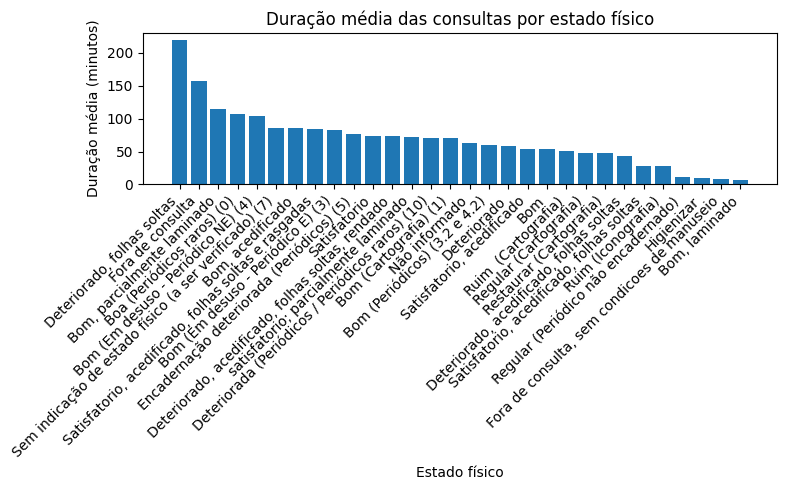

In [0]:
%python
# Duração média das consultas por estado físico

df_estado_duracao = spark.sql("""
SELECT
  estado_fisico,
  AVG(duracao_minutos) AS duracao_media_minutos
FROM consultas_fbn_tratada
WHERE duracao_minutos IS NOT NULL
GROUP BY estado_fisico
ORDER BY duracao_media_minutos DESC
""")

import pandas as pd
import matplotlib.pyplot as plt

pdf_estado_duracao = df_estado_duracao.toPandas()

# Tratar nulos de rótulo, se aparecerem
pdf_estado_duracao["estado_fisico"] = pdf_estado_duracao["estado_fisico"].fillna("Não informado")

plt.figure(figsize=(8, 5))
plt.bar(pdf_estado_duracao["estado_fisico"], pdf_estado_duracao["duracao_media_minutos"])
plt.xlabel("Estado físico")
plt.ylabel("Duração média (minutos)")
plt.title("Duração média das consultas por estado físico")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



Embora limitado pela escassez de valores não-nulos, o gráfico sugere que materiais em pior estado físico tendem a permanecer mais tempo em consulta. Os dados, no entanto, precisam ser interpretados com cautela devido ao baixo volume de registros.

#### 5.4.5 Aspectos operacionais

Neste bloco, o olhar se volta para **indicadores operacionais do atendimento**, combinando duração de consulta com recortes por unidade e por obra. As perguntas principais são: **qual é a duração média das consultas por unidade de acervo e quais obras permanecem mais tempo em consulta?**  
Ao analisar tempo médio por unidade e identificar obras com maior duração total ou média, é possível reconhecer materiais que exigem mais tempo de atendimento, usos mais intensivos de determinados conjuntos e possíveis gargalos operacionais, contribuindo para o planejamento do serviço e para a gestão do tempo de uso do acervo.


In [0]:
-- 5.4.5.1 Duração média por unidade de acervo
SELECT 
    unidade_acervo,
    ROUND(AVG(duracao_minutos), 1) AS duracao_media
FROM consultas_fbn_tratada
GROUP BY unidade_acervo
ORDER BY duracao_media DESC;




unidade_acervo,duracao_media
Obras Gerais,96.1
Publicações Seriadas,91.3
Obras Raras,71.2
Publicações Seriadas Raras,66.5
Música,58.6
Manuscritos,53.2
Cartografia,49.8
Iconografia,25.8
null,null


**Visualização | Duração média por unidade de acervo**

Gráfico de barras horizontais mostrando a duração média das consultas em minutos por unidade de acervo. Permite comparar rapidamente quais setores concentram consultas mais longas e identificar diferenças operacionais entre eles.


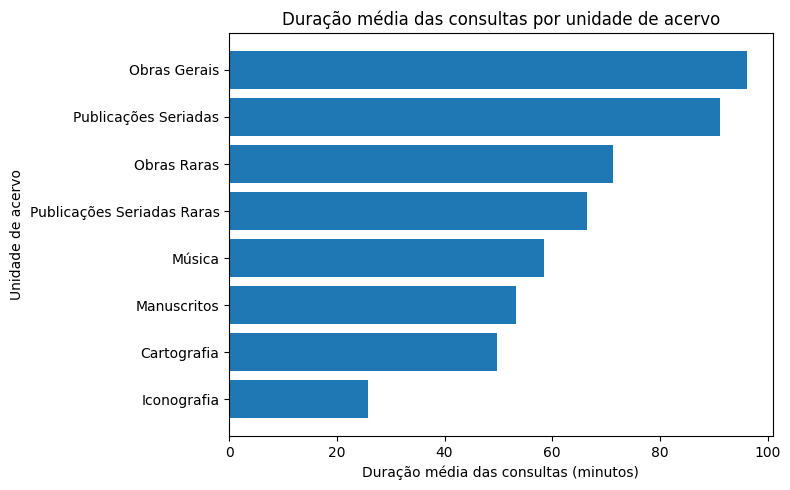

In [0]:
%python
# 5.4.5 Aspectos operacionais – visualizações em Python (Pandas + Matplotlib)

import pandas as pd
import matplotlib.pyplot as plt

# 1) Duração média por unidade de acervo
query_duracao_unidade = """
SELECT
  unidade_acervo,
  AVG(duracao_minutos) AS duracao_media_minutos
FROM consultas_fbn_tratada
WHERE duracao_minutos IS NOT NULL
  AND unidade_acervo IS NOT NULL
GROUP BY unidade_acervo
"""

df_duracao_unidade = spark.sql(query_duracao_unidade).toPandas()

# Ordena pela duração média para deixar o gráfico mais legível
df_duracao_unidade = df_duracao_unidade.sort_values("duracao_media_minutos", ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(df_duracao_unidade["unidade_acervo"], df_duracao_unidade["duracao_media_minutos"])
plt.xlabel("Duração média das consultas (minutos)")
plt.ylabel("Unidade de acervo")
plt.title("Duração média das consultas por unidade de acervo")
plt.tight_layout()
plt.show()




A análise mostra que Obras Gerais e Publicações Seriadas apresentam maior tempo médio de consulta. Iconografia, apesar do alto volume de uso, possui tempo médio significativamente menor, indicando perfis distintos de pesquisa.

In [0]:
-- 5.4.5.2 Ranking das obras com maior duracao_minutos média ou total 
SELECT 
    titulo,
    duracao_minutos,
    material
FROM consultas_fbn_tratada
ORDER BY duracao_minutos DESC
LIMIT 15;


titulo,duracao_minutos,material
Faça sua vida valer a pena,452.0,Livro
"Velhas fotografias pernambucanas, 1851-1890",444.0,Livro
O jogo da dissimulação,433.0,Livro
O teatro das oligarquias,433.0,Livro
Faça sua vida valer a pena,422.0,Livro
"A força desconhecida, pesquisa de fenômenos parapsíquicos no país mais psíquico do mundo",422.0,Livro
Materializacoes luminosas,422.0,Livro
Idéias em movimento,418.0,Livro
A força do pensamento,415.0,Livro
"Como ativar, desenvolver e usar o poder subconsciente da sua mente",415.0,Livro


#### 5.4.6 Picos e sazonalidade
Esta subetapa busca responder: **houve picos atípicos de consulta em algum dia e como se comporta a curva diária de uso ao longo do período?**  
A partir da contagem de consultas por dia, do cálculo de média e desvio padrão e da identificação de dias muito acima da tendência geral, é possível detectar anomalias, eventos específicos ou períodos de sobrecarga. Essa leitura contribui para compreender sazonalidades, planejar recursos e investigar causas associadas a picos de demanda.


In [0]:
-- 5.4.6.1 Consultas por dia (view auxiliar)
CREATE OR REPLACE TEMP VIEW consultas_por_dia AS
SELECT
    data_inicio_consulta,
    COUNT(*) AS total_consultas
FROM consultas_fbn_tratada
GROUP BY data_inicio_consulta;




In [0]:
-- 5.4.6.2 Estatísticas globais das consultas diárias
CREATE OR REPLACE TEMP VIEW estatisticas_consultas AS
SELECT
    AVG(total_consultas)        AS media_consultas,
    STDDEV_POP(total_consultas) AS desvio_consultas
FROM consultas_por_dia;


In [0]:
-- 5.4.6.3 Identificação de possíveis picos atípicos (z-score ≥ 3)
SELECT
    c.data_inicio_consulta,
    c.total_consultas,
    ROUND(
        (c.total_consultas - e.media_consultas) / e.desvio_consultas,
        2
    ) AS z_score
FROM consultas_por_dia c
CROSS JOIN estatisticas_consultas e
WHERE e.desvio_consultas IS NOT NULL
  AND (c.total_consultas - e.media_consultas) / e.desvio_consultas >= 3
ORDER BY z_score DESC;


data_inicio_consulta,total_consultas,z_score
2024-03-12,778,7.39
2024-03-18,707,6.62
2024-06-07,415,3.46
2024-08-01,411,3.42
2024-08-08,406,3.36
2024-08-02,395,3.24


**Visualização | Volume diário de consultas**

O gráfico de linha apresenta o volume de consultas por dia ao longo do período analisado. A curva permite identificar dias de maior ou menor uso do acervo e serve como base para localizar possíveis picos pontuais de demanda.


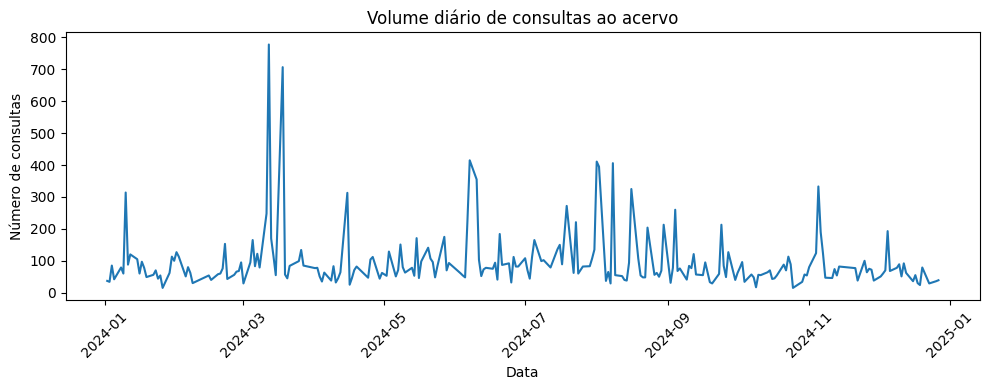

In [0]:
%python
import pandas as pd
import matplotlib.pyplot as plt

# 5.4.6 Picos e sazonalidade

# 1) Base diária de consultas a partir da tabela tratada
df_diario = spark.sql("""
SELECT
  data_inicio_consulta AS data,
  COUNT(*) AS total_consultas
FROM consultas_fbn_tratada
GROUP BY data_inicio_consulta
ORDER BY data_inicio_consulta
""").toPandas()

# Garante que a coluna 'data' está como datetime no pandas
df_diario["data"] = pd.to_datetime(df_diario["data"])

# 2) Cálculo da média móvel de 7 dias para suavizar a série
df_diario["media_movel_7d"] = df_diario["total_consultas"].rolling(window=7, min_periods=1).mean()

# ------------------------------------------------------------------
# Gráfico 1  Volume diário de consultas (linha simples)
# ------------------------------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(df_diario["data"], df_diario["total_consultas"])
plt.title("Volume diário de consultas ao acervo")
plt.xlabel("Data")
plt.ylabel("Número de consultas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A linha temporal revela dias com volume atipicamente elevado, especialmente em março, junho e agosto. Esses pontos podem representar eventos específicos, demandas concentradas ou fluxos fora do padrão regular.

**Visualização | Tendência com média móvel (7 dias)**

Nesta visualização, a série diária é suavizada por uma média móvel de 7 dias. A linha de tendência ajuda a destacar movimentos mais estruturais de aumento ou queda na demanda, reduzindo o ruído de variações muito pontuais.


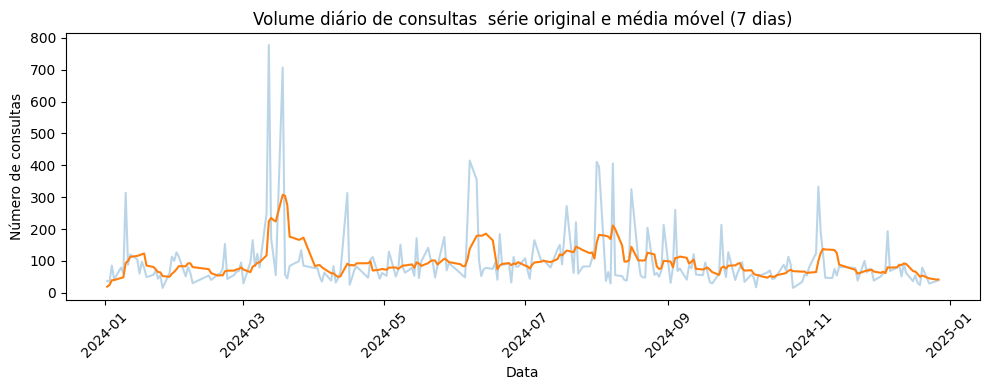

In [0]:
%python
# Gráfico 2  Tendência com média móvel de 7 dias
# ------------------------------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(df_diario["data"], df_diario["total_consultas"], alpha=0.3)
plt.plot(df_diario["data"], df_diario["media_movel_7d"])
plt.title("Volume diário de consultas  série original e média móvel (7 dias)")
plt.xlabel("Data")
plt.ylabel("Número de consultas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Visualização | Distribuição das consultas diárias**

O histograma mostra como o número de consultas se distribui entre os dias, indicando quais faixas de volume são mais frequentes. Essa leitura complementa os gráficos de linha, evidenciando se o padrão diário é mais concentrado ou disperso em termos de uso do acervo.


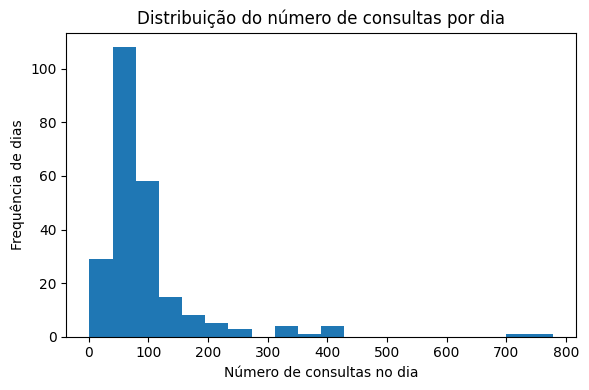

In [0]:
%python
# Gráfico 3  Distribuição das consultas diárias (histograma)
# ------------------------------------------------------------------
plt.figure(figsize=(6, 4))
df_diario["total_consultas"].plot(kind="hist", bins=20)
plt.title("Distribuição do número de consultas por dia")
plt.xlabel("Número de consultas no dia")
plt.ylabel("Frequência de dias")
plt.tight_layout()
plt.show()

#### 5.4.7 Obras mais consultadas
Por fim, este bloco responde à pergunta: **quais obras são mais frequentemente consultadas ao longo do período analisado?**  
O ranking por número de consultas permite identificar títulos de alta demanda, obras de referência em determinadas áreas e potenciais candidatos a ações específicas, como digitalização prioritária, preservação reforçada ou ampliação de exemplares. Essa visão ajuda a conectar o uso real do acervo às estratégias de difusão, preservação e atendimento.



In [0]:
-- 5.4.7 Ranking das obras mais consultadas
SELECT
  titulo,
  material,
  COUNT(*) AS total_consultas
FROM consultas_fbn_tratada
GROUP BY titulo, material
ORDER BY total_consultas DESC
LIMIT 20;



titulo,material,total_consultas
Allegro,Documento Fotográfico,1136
Andante,Documento Fotográfico,674
Finale,Documento Fotográfico,514
Adagio,Documento Fotográfico,337
Andantino,Documento Fotográfico,303
Art,Documento Fotográfico,226
Cláudia,Periódico ou jornal,213
O Globo,Periódico ou jornal,180
"[Série de 24 negativos com registros de logradouros (ruas avenidas, praças etc.) do centro do Rio de Janeiro.]",Documento Fotográfico,166
null,Documento textual,157


**Visualização | Obras mais consultadas**

Gráfico de barras horizontais apresentando as 20 obras com maior número de consultas registradas no período, permitindo identificar títulos de referência no acervo e materiais que concentram maior demanda.


/home/spark-bd564d35-bf0b-4116-9850-a5/.ipykernel/3377/command-7368224377509041-2785515299:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


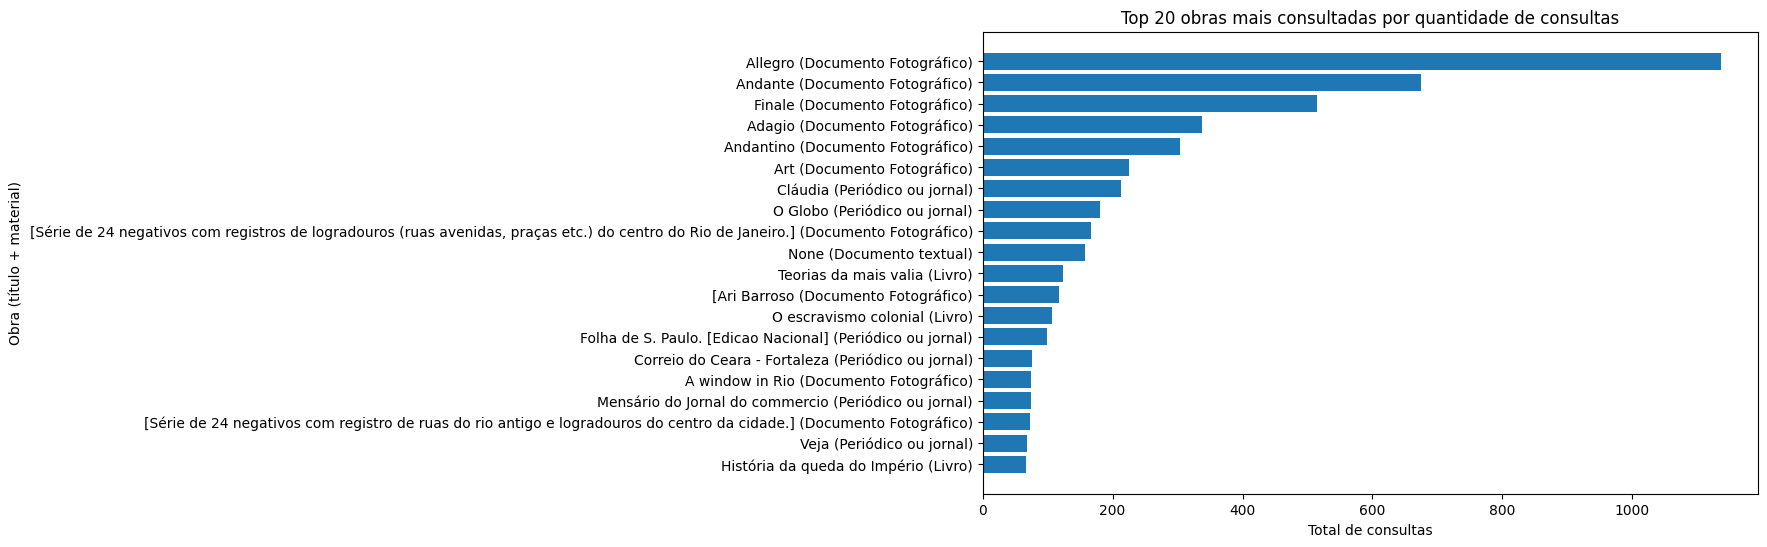

In [0]:
%python
import pandas as pd
import matplotlib.pyplot as plt

# 1) Rodar o SQL e trazer top 20 obras + material
query_obras_top = """
SELECT
  titulo,
  material,
  COUNT(*) AS total_consultas
FROM consultas_fbn_tratada
GROUP BY titulo, material
ORDER BY total_consultas DESC
LIMIT 20
"""

df_rank = spark.sql(query_obras_top).toPandas()

# 2) Tratar nulos e garantir tudo como string
df_rank["material"] = df_rank["material"].fillna("Sem informação")
df_rank["titulo"] = df_rank["titulo"].astype(str)
df_rank["material"] = df_rank["material"].astype(str)

# 3) Criar coluna combinada título + material
df_rank["obra_material"] = df_rank["titulo"] + " (" + df_rank["material"] + ")"

# 4) Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(df_rank["obra_material"], df_rank["total_consultas"])
plt.xlabel("Total de consultas")
plt.ylabel("Obra (título + material)")
plt.title("Top 20 obras mais consultadas por quantidade de consultas")

# Inverter eixo Y para a obra mais consultada ficar no topo
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


A lista revela enorme concentração de consultas em séries fotográficas da categoria “Documento Fotográfico”. O comportamento sugere que determinados conjuntos iconográficos funcionam como “hits” do acervo.

### 5.5 Discussão dos resultados

Esta seção integra os principais achados das análises exploratórias realizadas sobre a tabela tratada de consultas ao acervo, articulando os resultados obtidos por meio de consultas SQL e visualizações gráficas. O objetivo é interpretar os padrões identificados à luz da pergunta central do projeto, que busca compreender **como, quando e sobre quais tipos de itens o acervo é mais consultado**, considerando aspectos temporais, materiais e operacionais.

As análises aqui apresentadas permitem relacionar o comportamento de uso do acervo às características físicas dos itens, à organização das unidades de acervo e às dinâmicas temporais de consulta, oferecendo subsídios para reflexões institucionais, operacionais e estratégicas.

Os aspectos discutidos nesta seção incluem:

- **Materiais com maior volume de consultas**, indicando possíveis prioridades de acesso, difusão e preservação  
- **Padrões temporais relevantes**, como sazonalidade mensal, distribuição semanal e ocorrência de picos atípicos de consulta  
- **Unidades de acervo que concentram maior demanda**, sugerindo assimetrias de uso entre diferentes áreas  
- **Relação entre estado físico dos itens e padrão de consulta**, com atenção às limitações dos dados disponíveis  
- **Evidências sobre práticas e rotinas operacionais**, observadas a partir da duração média das consultas e dos horários de uso  
- **Limitações interpretativas**, decorrentes de valores ausentes, categorias genéricas e restrições inerentes ao caráter operacional do dataset  

A discussão busca, portanto, **conectar os resultados quantitativos às perguntas de negócio propostas**, integrando os gráficos e tabelas produzidos ao longo da etapa de análise a um storytelling analítico coerente, alinhado ao objetivo do MVP e às possibilidades de uso institucional dos dados.

A análise dos dados de consultas realizadas ao longo de 2024 revela padrões consistentes que ajudam a compreender o comportamento de uso do acervo da instituição. Observa-se forte concentração em três tipos de material: livros, documentos fotográficos e documentos textuais, que juntos representam a maior parte da demanda registrada. Esse padrão sugere que o acervo bibliográfico e iconográfico continua desempenhando papel central nas práticas de pesquisa, refletindo tanto o perfil dos usuários quanto a abrangência e a organização desses fundos.

No eixo temporal, identificou-se variação significativa ao longo do ano, com crescimento progressivo das consultas entre os meses de março e agosto. A distribuição semanal apresenta estabilidade, com maior fluxo entre segunda e sexta-feira, reforçando o uso do acervo como atividade regular e institucionalizada. A detecção de picos atípicos, dias com volume muito acima da média, indica que fatores contextuais, como atividades acadêmicas, demandas editoriais, projetos de pesquisa ou eventos específicos, podem impactar momentaneamente a operação do atendimento.

As análises por unidade de acervo mostram que Obras Gerais, Iconografia e Manuscritos concentram a maior parte do movimento, porém com dinâmicas distintas de duração das consultas. Enquanto Obras Gerais combina alto volume com tempos médios elevados, Iconografia apresenta alta demanda acompanhada de consultas mais curtas, possivelmente associadas à natureza seriada dos documentos e à existência de instrumentos de pesquisa mais diretos, como séries fotográficas, catálogos ou índices.

No que se refere ao estado físico dos materiais, a predominância de registros nulos evidencia uma limitação importante na captura dessa informação, o que restringe inferências mais robustas. Ainda assim, os poucos registros válidos sugerem que itens classificados como deteriorados tendem a permanecer mais tempo em consulta, um comportamento plausível do ponto de vista técnico, mas que deve ser interpretado com cautela devido ao baixo volume de observações.

Sob a perspectiva operacional, os resultados indicam variação relevante no tempo médio de consulta entre as unidades de acervo, refletindo diferentes complexidades de uso, níveis de mediação e tipos de material. Além disso, o ranking das obras mais consultadas evidencia a existência de conjuntos específicos, especialmente séries fotográficas, que funcionam como “hits de alto impacto”, concentrando grande volume de solicitações e podendo demandar atenção especial em termos de acesso, preservação e difusão.

De forma integrada, os achados demonstram que o acervo apresenta padrões de uso relativamente previsíveis, com sazonalidades claras, setores de maior carga de trabalho e materiais com comportamentos bastante distintos. Esses insights podem subsidiar decisões institucionais relacionadas à priorização de digitalização, ao planejamento de equipes, à revisão de instrumentos de pesquisa, à organização do atendimento e ao fortalecimento de estratégias de preservação preventiva.

Em síntese, a análise permite compreender não apenas **quanto** o acervo é utilizado, mas **como**, **quando** e **em quais segmentos** ele é acionado, oferecendo uma base consistente para diagnósticos operacionais e para a formulação de estratégias futuras orientadas por dados.

### 5.6 Síntese visual dos resultados (Dashboard)

O dashboard consolida visualmente os principais padrões identificados ao longo das análises exploratórias, reunindo indicadores sobre volume de consultas, materiais mais demandados, unidades de acervo com maior uso, distribuição por período do dia, duração média das consultas e evolução mensal ao longo de 2024.

A visualização integrada permite observar que:
- a maior parte das consultas ocorre no período da tarde,
- livros e documentos textuais concentram o maior volume de uso,
- determinadas unidades de acervo apresentam demanda significativamente superior às demais,
- há variações mensais claras no volume de consultas, com picos e quedas ao longo do ano,
- o tempo médio de consulta varia entre materiais, indicando diferentes padrões de permanência no acervo.

Essas representações visuais sintetizam os resultados obtidos por meio das análises em SQL, facilitando a interpretação dos dados e apoiando a leitura integrada dos achados apresentados nas seções anteriores. O dashboard atua como camada final de consumo analítico, conectando métricas, contexto operacional e comunicação visual.

**Visualização | Dashboard final: Uso do acervo da FBN em 2024**

![Dashboard uso do acervo](https://chascaldini.github.io/mvp-eng-dados-consultas-acervo/img/5.6_dashboard_analitico_tableau.png)

## 6) Governança, Linhagem e Ética

Esta etapa documenta os elementos essenciais de governança do pipeline, incluindo catálogo de dados, rastreabilidade entre as etapas, políticas mínimas de segurança e considerações éticas referentes ao uso de dados públicos. Esses componentes asseguram transparência, reprodutibilidade e conformidade, reforçando a integridade do MVP como um projeto completo de engenharia de dados.


### 6.1 Catálogo de Dados (Data Dictionary)

O catálogo de dados documenta de forma sistemática as colunas da tabela tratada, descrevendo seus tipos, significados, origens e transformações aplicadas ao longo do pipeline. Essa documentação tem como objetivo facilitar a interpretação do modelo, esclarecer o papel de cada variável e garantir transparência para usos analíticos futuros.

A tabela consolidada (`consultas_fbn_tratada`) reúne variáveis originais provenientes do arquivo CSV de origem e variáveis derivadas criadas durante a etapa de transformação, possibilitando análises temporais, operacionais e categóricas sobre o uso do acervo.

O catálogo apresentado nesta seção inclui, para cada coluna:

- **Nome da coluna**  
- **Tipo de dado (Spark SQL)**  
- **Descrição funcional da variável**  
- **Origem** (bruta ou derivada)  
- **Exemplo de valor**  
- **Observações técnicas**, quando aplicável  
- **Domínio ou notas de uso**, quando relevantes  

Esse dicionário de dados reforça as práticas de governança do pipeline, contribuindo para a rastreabilidade das informações, a reprodutibilidade do MVP e a compreensão do modelo por qualquer pessoa que venha a avaliar, auditar ou reutilizar o projeto.

Como complemento à documentação textual, foram adicionadas descrições funcionais diretamente no catálogo técnico da tabela tratada. No Databricks, essas descrições são registradas por meio do comando `ALTER TABLE … ALTER COLUMN … COMMENT`, incorporando as informações ao metadado oficial da tabela.

Após a aplicação dos comentários, a consulta `DESCRIBE EXTENDED` é utilizada para validar o catálogo e visualizar as descrições associadas a cada coluna, comprovando que a tabela encontra-se devidamente documentada no ambiente técnico da plataforma.



#### 6.1.1 Identificação da obra e características bibliográficas (I)

Este grupo reúne as colunas responsáveis por identificar a obra consultada e descrever suas características bibliográficas básicas. Esses campos são fundamentais para análises de perfil de uso por tipo de material, recorrência de consultas e padrões associados à natureza do acervo.

| Coluna          | Tipo (Spark SQL) | Origem | Descrição funcional                                             | Exemplo                         | Observações técnicas                                   | Domínio / Notas |
|-----------------|-----------------|--------|------------------------------------------------------------------|----------------------------------|--------------------------------------------------------|-----------------|
| titulo          | STRING          | Bruta  | Título da obra consultada no atendimento ao usuário.            | *Geografia histórica do Rio*     | Campo textual livre, pode conter variações e ruídos.   | Texto livre     |
| tipo            | STRING          | Bruta  | Categoria geral do item consultado (ex.: obra, periódico).      | Obra                             | Padronizado por limpeza textual básica.                | Obra, Periódico |
| material        | STRING          | Bruta  | Natureza física ou suporte do item consultado.                  | Livro                            | Alta diversidade de valores.                           | Texto categórico |
| tombo           | STRING          | Bruta  | Identificador institucional único do item no acervo.           | 1.347.806                        | Mantido como string para preservar formatação original.| Identificador   |
| volume          | STRING          | Bruta  | Indicação de volume da obra, quando aplicável.                  | 2                                | Alto volume de valores ausentes.                       | Texto livre     |
| edicao_numero   | STRING          | Bruta  | Número de edição ou fascículo da obra consultada.               | 1                                | Campo textual não padronizado.                          | Texto livre     |


#### 6.1.2 Identificação da obra e características bibliográficas (II)
Este grupo reúne as colunas relacionadas ao ano de publicação da obra, mantendo tanto o valor original proveniente da fonte quanto a versão tratada e padronizada para fins analíticos. A preservação do campo bruto permite auditoria e rastreabilidade, enquanto a versão derivada possibilita análises temporais consistentes.

| Coluna          | Tipo (Spark SQL) | Origem | Descrição funcional                                             | Exemplo                         | Observações técnicas                                   | Domínio / Notas |
|-----------------|-----------------|--------|------------------------------------------------------------------|----------------------------------|--------------------------------------------------------|-----------------|
| ano_publicacao_raw          | STRING          | Bruta  | Ano de publicação conforme registrado na fonte original, incluindo inconsistências.             | `18--`   | Campo preservado para auditoria e rastreabilidade; contém ruídos e valores inválidos.    | Texto livre, não confiável para análise direta.     |
| ano_publicacao     | INT              | Derivada | Ano de publicação obtido após limpeza e conversão do campo original.                | `1936`  | Extraído via regex e cast; valores inválidos convertidos para nulo.                   | Utilizado em análises temporais e comparações históricas. |

#### 6.1.3 Organização institucional e circulação
Este grupo reúne as colunas relacionadas à organização institucional do atendimento e às condições de circulação dos itens consultados. Esses campos permitem analisar como o uso do acervo se distribui entre diferentes unidades, modalidades de atendimento e estados físicos dos materiais.

As variáveis aqui documentadas são especialmente relevantes para diagnósticos operacionais, identificação de assimetrias de demanda entre setores e reflexões sobre preservação, acesso e políticas internas de circulação.

| Coluna          | Tipo   | Origem | Descrição funcional                                 | Exemplo     | Observações técnicas             | Domínio / Notas                   |
| --------------- | ------ | ------ | --------------------------------------------------- | ----------- | -------------------------------- | --------------------------------- |
| unidade_acervo  | STRING | Bruta  | Unidade institucional responsável pelo atendimento. | Iconografia | Padronizada via limpeza textual. | Domínio fechado após diagnóstico. |
| tipo_circulacao | STRING | Bruta  | Modalidade de uso do item durante a consulta.       | Local       | Categoria praticamente única.    | Indica restrição de uso externo.  |
| estado_fisico   | STRING | Bruta  | Condição física informada no momento da consulta.   | Regular     | Alta taxa de valores nulos.      | Uso analítico limitado.           |


#### 6.1.4 Datas e horários da consulta
Este conjunto documenta as colunas responsáveis por registrar quando a consulta ocorreu, separando datas e horários de início e devolução do atendimento. Esses campos são fundamentais para análises temporais, cálculos de duração e estudos sobre padrões de uso ao longo do dia, da semana ou do ano.

Durante a etapa de transformação, essas variáveis passaram por conversão de tipos, sendo padronizadas para os formatos nativos DATE e TIMESTAMP, garantindo consistência e viabilizando análises temporais mais precisas.

| Coluna               | Tipo      | Origem             | Descrição funcional                            | Exemplo    | Observações técnicas      | Domínio / Notas                |
| -------------------- | --------- | ------------------ | ---------------------------------------------- | ---------- | ------------------------- | ------------------------------ |
| data_inicio_consulta | DATE      | Bruta → Convertida | Data de início da consulta no balcão.          | 2024-03-12 | Conversão para tipo DATE. | Base para derivadas temporais. |
| hora_inicio_consulta | TIMESTAMP | Bruta → Convertida | Horário de início da consulta.                 | 11:07:00   | Conversão para TIMESTAMP. | Usado no cálculo de duração.   |
| data_devolucao       | DATE      | Bruta → Convertida | Data de devolução ou encerramento da consulta. | 2024-03-12 | Pode conter nulos.        | —                              |
| hora_devolucao       | TIMESTAMP | Bruta → Convertida | Horário de devolução do item.                  | 14:03:00   | Pode conter nulos.        | —                              |


#### 6.1.5 Variáveis temporais derivadas para análise
Este grupo reúne variáveis temporais derivadas a partir das datas e horários de consulta, criadas especificamente para apoiar análises exploratórias e métricas analíticas. Esses campos não existem na base original e foram construídos na etapa de transformação com o objetivo de facilitar agregações, comparações e visualizações temporais.

As variáveis incluem recortes por ano, mês, dia da semana (numérico e textual), hora e período do dia, permitindo investigar padrões de sazonalidade, rotinas de uso e comportamentos recorrentes no atendimento ao acervo.

| Coluna           | Tipo   | Origem   | Descrição funcional                                | Exemplo | Observações técnicas                    | Domínio / Notas           |
| ---------------- | ------ | -------- | -------------------------------------------------- | ------- | --------------------------------------- | ------------------------- |
| ano_consulta     | INT    | Derivada | Ano da consulta extraído da data de início.        | 2024    | Consistente com `data_inicio_consulta`. | —                         |
| mes_consulta     | INT    | Derivada | Mês da consulta (1 a 12).                          | 3       | Extraído via funções de data.           | Útil para sazonalidade.   |
| dia_semana_texto | STRING | Derivada | Dia da semana correspondente à data da consulta.   | Tuesday | Gerado via `date_format`.               | Representação textual.    |
| dia_semana_num | INT | Derivada | Representa o dia da semana da consulta em formato numérico. | 1 (segunda-feira) | Derivado a partir da data de início da consulta usando funções de data. | 1 (segunda) a 7 (domingo) |
| hora_inicio_num  | INT    | Derivada | Hora do início da consulta em formato numérico.    | 11      | Extração do timestamp.                  | Base para período do dia. |
| periodo_dia      | STRING | Derivada | Classificação do horário em manhã, tarde ou noite. | Manhã   | Regra condicional baseada na hora.      | Domínio fechado.          |


#### 6.1.6 Métrica operacional derivada
Este grupo documenta a métrica operacional derivada criada a partir da combinação entre horários de início e devolução da consulta. Essa variável sintetiza o tempo total de permanência do item em atendimento, permitindo análises sobre complexidade de uso, esforço operacional e diferenças entre tipos de material e unidades de acervo.

A métrica foi calculada em minutos e validada durante a etapa de qualidade de dados, sendo utilizada tanto em análises descritivas quanto em visualizações exploratórias ao longo do MVP.

| Coluna          | Tipo   | Origem   | Descrição funcional                    | Exemplo | Observações técnicas                      | Domínio / Notas         |
| --------------- | ------ | -------- | -------------------------------------- | ------- | ----------------------------------------- | ----------------------- |
| duracao_minutos | DOUBLE | Derivada | Duração total da consulta, em minutos. | 176     | Calculada via diferença entre timestamps. | Valores zero possíveis. |


#### 6.1.7 Comentários no catálogo técnico (metadados da tabela)

Como complemento ao catálogo de dados apresentado anteriormente, foram adicionadas descrições funcionais diretamente às colunas da tabela tratada no Databricks. Esses comentários passam a integrar o metadado oficial da tabela, facilitando a interpretação técnica do modelo por outros analistas, desenvolvedores ou equipes de governança.

Os comentários foram registrados por meio do comando `ALTER TABLE … ALTER COLUMN … COMMENT`, permitindo associar a cada coluna uma descrição clara sobre seu significado, origem e uso analítico.

Após a aplicação dos comentários, a instrução `DESCRIBE EXTENDED` foi utilizada para validar a documentação, exibindo as descrições incorporadas às colunas no catálogo técnico da plataforma.


In [0]:
COMMENT ON TABLE consultas_fbn_tratada IS 'Tabela tratada contendo registros de consultas a obras culturais, padronizados e enriquecidos com colunas derivadas para análise.';


In [0]:
-- 6.1.7 Identificação da obra
ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN titulo COMMENT "Título da obra consultada no atendimento ao usuário.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN tipo COMMENT "Categoria geral do item consultado (ex.: obra, periódico).";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN material COMMENT "Natureza física ou suporte do item consultado.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN tombo COMMENT "Identificador institucional do item no acervo.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN volume COMMENT "Indicação de volume da obra, quando aplicável.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN edicao_numero COMMENT "Número de edição, fascículo ou numeração da obra.";

-- Ano de publicação
ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN ano_publicacao_raw COMMENT "Ano conforme registrado na fonte original, incluindo inconsistências e ruídos.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN ano_publicacao COMMENT "Ano obtido após limpeza e conversão do campo original.";

-- Organização institucional e circulação
ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN unidade_acervo COMMENT "Unidade do acervo responsável pelo atendimento.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN estado_fisico COMMENT "Condição física informada do item no momento da consulta.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN tipo_circulacao COMMENT "Modalidade de circulação do item (ex.: local).";

-- Datas e horários da consulta
ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN data_inicio_consulta COMMENT "Data de início da consulta ao item.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN hora_inicio_consulta COMMENT "Horário de início da consulta.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN data_devolucao COMMENT "Data de encerramento da consulta ou devolução do item.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN hora_devolucao COMMENT "Horário de encerramento da consulta.";

-- Variáveis temporais derivadas
ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN ano_consulta COMMENT "Ano extraído a partir da data de início da consulta.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN mes_consulta COMMENT "Mês extraído da data de início da consulta (1–12).";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN dia_semana_num COMMENT "Número do dia da semana da consulta (1=segunda a 7=domingo).";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN dia_semana_texto COMMENT "Nome do dia da semana da consulta.";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN hora_inicio_num COMMENT "Hora do início da consulta em formato numérico (0–23).";

ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN periodo_dia COMMENT "Classificação do horário da consulta em manhã, tarde ou noite.";

-- Métrica operacional
ALTER TABLE consultas_fbn_tratada 
ALTER COLUMN duracao_minutos COMMENT "Duração total da consulta calculada em minutos a partir dos timestamps de início e devolução.";


In [0]:
DESCRIBE EXTENDED consultas_fbn_tratada;

col_name,data_type,comment
titulo,string,Título da obra consultada no atendimento ao usuário.
tipo,string,"Categoria geral do item consultado (ex.: obra, periódico)."
material,string,Natureza física ou suporte do item consultado.
tombo,string,Identificador institucional do item no acervo.
ano_publicacao_raw,string,"Ano conforme registrado na fonte original, incluindo inconsistências e ruídos."
ano_publicacao,int,Ano obtido após limpeza e conversão do campo original.
volume,string,"Indicação de volume da obra, quando aplicável."
edicao_numero,string,"Número de edição, fascículo ou numeração da obra."
unidade_acervo,string,Unidade do acervo responsável pelo atendimento.
estado_fisico,string,Condição física informada do item no momento da consulta.


### 6.2 Linhagem de dados (Data Lineage)  

A linhagem de dados descreve o percurso das informações ao longo do pipeline analítico, permitindo compreender a origem dos dados, as principais etapas de transformação e as estruturas finais utilizadas para análise e consumo. Seu objetivo é garantir transparência, rastreabilidade e reprodutibilidade do processo.

No contexto deste MVP, a linhagem foi representada de forma simples e direta, refletindo a arquitetura efetivamente implementada no projeto. O fluxo parte de uma fonte externa pública, passa por uma etapa de ingestão e transformação no Databricks e culmina em estruturas analíticas destinadas à verificação de qualidade, análise exploratória, visualização e governança.

A representação contempla:
 
**Fonte Externa (dados originais públicos)**
- Origem: Portal Brasileiro de Dados Abertos (dados.gov.br)
- Dataset: Obras consultadas por pesquisadores (2024)
- Formato: CSV

Os dados são disponibilizados publicamente e representam registros operacionais de consultas ao acervo realizadas ao longo do ano de 2024.

**Ingestão no Databricks | Camada raw**
- Tabela bruta: `consultas_fbn_bruta`
- Dados preservados conforme a fonte original
- Estrutura mantida sem alterações semânticas
- Serve como referência íntegra para auditoria e validação

*`Fonte externa → Tabela bruta`*

**Etapa de transformação**  
A tabela bruta passa por um conjunto de operações voltadas à preparação analítica dos dados, incluindo:
- Diagnóstico e padronização textual
- Conversão de datas e horários para tipos nativos
- Criação de colunas derivadas temporais
- Limpeza leve e organização estrutural

**Camada tratada | Criação da tabela flat final**  
- Tabela final: `consultas_fbn_tratada`
- Campos consistentes e padronizados
- Variáveis temporais derivadas para análise
- Estrutura em formato flat table
- Gerada por meio de comando CTAS
Essa tabela constitui a base principal para as etapas de Data Quality e Analytics.

*`Tabela bruta → Tabela tratada`*

**Tabela analítica agregada | Camada de consumo opcional**  
- Tabela: `consultas_fbn_resumo`
- Visão agregada a partir da tabela tratada
- Voltada para relatórios, visões rápidas e apoio a dashboards
- Representa uma camada de consumo mais enxuta

**Data Quality + Analytics | Camada analítica e visualização**  
A partir da tabela tratada e da tabela agregada, são realizadas:
- Verificações de qualidade de dados
- Consultas analíticas em SQL
- Visualizações em Python (Pandas e Matplotlib)
- Discussão integrada dos resultados
- Construção de dashboard exploratório

**Etapa de Governança, Documentação e Reprodutibilidade**  
Como etapa final do pipeline, são consolidados os elementos de governança e documentação:
- Catálogo de dados: data dictionary em Markdown e comentários no Databricks
- Linhagem de dados: esquema ASCII do fluxo
- Reprodutibilidade: notebook, README, evidências e repositório GitHub

A seguir, apresenta-se a visualização ASCII da linhagem construída para este MVP.

        ┌────────────────────────┐
        | Fonte externa (CSV)    │
        └────────────────────────┘
                         │ Upload no Databricks 
                         ▼
        ┌────────────────────────────────────────┐
        | Tabela Bruta (ingestão) | Camada raw   |
        | consultas_fbn_bruta                    │
        └────────────────────────────────────────┘
                         │
                         │ Etapa Transform
                         │ 
                         ▼
        ┌────────────────────────────────────────────┐
        | Tabela final (flat table) | Camada tratada |
        | consultas_fbn_tratada                      │
        └────────────────────────────────────────────┘
                         | Tabela analítica agregada (consumo opcional)
                         | consultas_fbn_resumo
                         | 
                         ▼
        ┌─────────────────────────────────────────────────────┐
        | Data Quality, Analytics, Visualizações e Governança |
        └─────────────────────────────────────────────────────┘

### 6.3 Governança e Segurança

As práticas de governança adotadas neste MVP têm como objetivo assegurar organização, confiabilidade e transparência no tratamento dos dados, considerando o escopo pedagógico da disciplina e as limitações da Databricks Free Edition.

As diretrizes aplicadas incluem:

- **Preservação da fonte**: a tabela bruta é mantida sem alterações, garantindo rastreabilidade e possibilidade de auditoria.
- **Separação lógica de camadas**: ingestão, transformação e consumo são executados em etapas distintas e claramente documentadas.
- **Documentação estruturada**: cada etapa do pipeline apresenta explicações, comentários técnicos e evidências de execução.
- **Padronização de nomenclaturas**: uso consistente de snake_case para nomes de tabelas e colunas, facilitando consultas e manutenção.
- **Validação contínua**: verificações de schema, tipos e volumes são realizadas após cada transformação para assegurar integridade dos dados.
- **Reprodutibilidade**: comandos SQL, visualizações e evidências estão concentrados no notebook e organizados no repositório GitHub.

Embora o ambiente não exija controles avançados de segurança, as práticas adotadas seguem princípios de governança compatíveis com projetos reais de engenharia de dados.

### 6.4 LGPD e considerações éticas

O dataset utilizado neste MVP não contém dados pessoais identificáveis, informações sensíveis ou elementos que permitam a reidentificação de indivíduos, estando fora do escopo de aplicação da Lei Geral de Proteção de Dados (LGPD). Os registros descrevem exclusivamente características das obras consultadas e aspectos operacionais do serviço, sem qualquer vínculo com as pessoas usuárias.

Ainda assim, foram observados princípios éticos relevantes para o uso de dados públicos em contextos analíticos:

- **Transparência da fonte:** a origem do dataset é explicitamente identificada e referenciada conforme documentação oficial.
- **Finalidade acadêmica:** a utilização dos dados limita-se ao escopo pedagógico do MVP.
- **Integridade da informação:** os dados brutos são preservados integralmente, com transformações restritas à camada tratada.
- **Responsabilidade interpretativa:** análises e visualizações têm caráter exploratório e não sustentam inferências sobre desempenho institucional.
- **Contextualização dos resultados:** a interpretação considera o domínio de acervos culturais e as limitações inerentes ao conjunto de dados.

Essas diretrizes asseguram alinhamento com boas práticas no uso de dados abertos e reforçam o compromisso ético do pipeline apresentado.



## 7) Autoavaliação

### Atingimento dos objetivos

O MVP atingiu o objetivo proposto de desenvolver um pipeline funcional de engenharia de dados, cobrindo todas as etapas previstas na disciplina, desde a ingestão até a análise e visualização dos resultados. O pipeline implementado contempla separação lógica de camadas, alinhada a práticas comuns de arquitetura de dados em ambientes analíticos: a tabela bruta corresponde à camada de ingestão (bronze), a tabela tratada à camada de padronização e enriquecimento (silver) e a tabela analítica resumida à camada de consumo (gold), respeitando o escopo e as limitações do projeto.

A escolha do dataset está alinhada à experiência prévia em organização e inserção de informações em bases de dados de acervos culturais. O MVP buscou explorar esse domínio sob a perspectiva da engenharia de dados, aplicando técnicas analíticas para investigar padrões de uso a partir de registros operacionais tradicionalmente tratados em nível descritivo.

### Aprendizados técnicos
Ao longo do desenvolvimento, foram consolidados conceitos fundamentais de engenharia de dados, incluindo ingestão em ambiente de nuvem, inspeção e padronização de dados, criação de colunas derivadas, materialização de tabelas analíticas e construção de consultas SQL orientadas à análise. A etapa de transformação exigiu atenção especial ao tratamento de datas, padronização textual e diagnóstico de inconsistências, reforçando o papel central da qualidade de dados como parte integrante do pipeline.

### Desafios encontrados
O uso de dados de acervos culturais trouxe desafios específicos, como heterogeneidade de registros, diversidade categórica e campos com preenchimento irregular. Além disso, destacam-se como dificuldades enfrentadas:
- a adaptação inicial ao ambiente Databricks e ao uso de Spark SQL;
- a interpretação de limitações estruturais da base original;
- o esforço para manter clareza, organização e rastreabilidade em um notebook único que integrasse código, evidências e documentação.

### Resultados obtidos
Apesar dessas limitações, o pipeline foi concluído de forma coerente, com validações em cada etapa e resultados analíticos capazes de responder às perguntas definidas no planejamento. As análises exploratórias demonstraram que a tabela tratada apresenta estrutura e qualidade adequadas para sustentar métricas, visualizações e interpretações sobre o uso do acervo.

### Possíveis evoluções
Como desdobramentos futuros, o projeto poderia ser aprimorado por meio de:
- adoção de modelos analíticos adicionais além de flat table;
- implementação de rotinas de automação e orquestração do pipeline;
- aprofundamento em práticas de versionamento e governança de dados;
- incorporação de análises estatísticas mais avançadas integradas ao domínio dos acervos culturais.

### Avaliação final
De forma geral, o desenvolvimento deste MVP permitiu consolidar os principais conceitos abordados na disciplina, articulando ingestão, transformação, análise e visualização de dados em um pipeline único e documentado. O projeto evidenciou a aplicação prática de técnicas de engenharia de dados em um contexto real, respeitando o escopo proposto e as limitações do ambiente utilizado.

A experiência contribuiu para fortalecer a compreensão sobre organização de dados, qualidade da informação e uso analítico de bases operacionais, estabelecendo uma base consistente para a continuidade dos estudos e para o aprofundamento em projetos futuros ao longo da pós-graduação.



## 8) Reprodutibilidade e informações finais

Esta etapa consolida os elementos necessários para garantir a compreensão, auditoria e reprodutibilidade do MVP. São apresentados a organização do repositório, os arquivos disponibilizados e as orientações básicas para reproduzir o pipeline, de modo que o projeto possa ser avaliado ou consultado sem dependência do ambiente original de desenvolvimento.

Também é incluído um diagrama ASCII que sintetiza o fluxo geral do projeto, oferecendo uma visão integrada do pipeline desde a ingestão dos dados até a camada analítica e de visualização. Por fim, são discutidas limitações práticas observadas durante o desenvolvimento, considerando o escopo acadêmico do MVP e as restrições do ambiente utilizado.

### 8.1 Estrutura do repositório e arquivos disponibilizados

O repositório público associado ao MVP reúne todos os materiais necessários para a inspeção e a reprodutibilidade do projeto. A estrutura foi organizada de forma clara e modular, com separação entre código, artefatos analíticos, evidências visuais e documentação complementar, facilitando a navegação e a compreensão do pipeline.


mvp-eng-dados-consultas-acervo/

├── dashboards/  
│   ├── README.md  
│   └── tableau_public_link.txt  
│   Link para o dashboard interativo no Tableau Public

├── data/  
│   ├── consultas_fbn_2024.csv  
│   ├── consultas_fbn_tratada.csv  
│   └── README.md  
│   Dataset original e versão tratada utilizada nas análises

├── html/  
│   ├── README.md  
│   └── mvp_eng_dados_consultas_acervo.html  
│   Notebook exportado em HTML para visualização externa

├── img/  
│   ├── 4.1.1_extract_upload_create-table.jpeg  
│   ├── 4.1.1_extract_upload_sample-data.jpeg  
│   ├── 4.3.1_load-ctas_tabela_tratada-comeco.jpeg  
│   ├── 4.3.1_load-ctas_tabela_tratada-final.jpeg  
│   ├── dashboard.jpeg  
│   └── README.md  
│   Evidências visuais das etapas do pipeline e do dashboard

├── sql/  
│   ├── README.md  
│   ├── 01_extract.sql  
│   ├── 02_transform.sql  
│   ├── 03_load_ctas_tabela_tratada.sql  
│   ├── 04_data_quality.sql  
│   ├── 05_analises_e_metricas.sql  
│   └── 06_comments_catalogo.sql  
│   Scripts SQL que documentam as principais etapas do pipeline  

├── mvp_eng_dados_consultas_acervo.ipynb  
│   Notebook executável do MVP  

├── README.md  
│   Documentação geral do projeto  

### 8.2 Passo a passo para reproduzir o pipeline

As instruções abaixo permitem reproduzir integralmente o fluxo do MVP em ambiente Databricks Free Edition, desde a ingestão do arquivo CSV até as análises finais e a disponibilização dos artefatos de entrega.

1. Criar um workspace no Databricks Free Edition  
   Acessar: https://www.databricks.com/br/learn/free-edition

2. Importar o arquivo CSV para o workspace  
   Navegar em Data → Add Data → Upload File → Create Table.  
   Utilizar o nome `consultas_fbn_bruta` para a tabela de ingestão.

3. Executar as etapas de ETL no notebook  
   - Extract: inspeção inicial, pré-visualização e validação da estrutura dos dados brutos.  
   - Transform: diagnóstico de qualidade, padronização textual e temporal, criação de colunas derivadas.  
   - Load: criação da tabela tratada por meio de CTAS (`consultas_fbn_tratada`) e geração da tabela analítica resumida.

4. Executar as verificações de Data Quality e as análises exploratórias  
   Rodar os blocos SQL da etapa 5 para validação da qualidade dos dados e cálculo das métricas analíticas.

5. Construir as visualizações  
   Utilizar a tabela tratada ou a tabela resumida como fonte para criação de gráficos e dashboards no Tableau Public.

6. Exportar o notebook executável (IPYNB)  
   Salvar o notebook final no formato `.ipynb` e incluí-lo na raiz do repositório para inspeção técnica do código e da execução.

7. Exportar o notebook para visualização externa (HTML)  
   Acessar File → Export → HTML e adicionar o arquivo exportado ao repositório GitHub para visualização externa.

### 8.3 Considerações finais e limitações práticas

O desenvolvimento deste MVP permitiu demonstrar um pipeline completo de engenharia de dados, desde a ingestão inicial até a construção de análises e visualizações. A estrutura adotada, baseada em uma tabela bruta, uma tabela tratada e uma tabela analítica resumida, mostrou-se adequada para responder às perguntas propostas e para ilustrar boas práticas do fluxo ETL em ambiente Databricks.

Algumas limitações práticas devem ser consideradas:

- **Ambiente Databricks Free Edition**  
  Restrições de cluster e recursos podem impactar a performance e inviabilizar a execução de processos mais complexos.

- **Natureza dos dados operacionais**  
  Por refletirem registros reais de atendimento da FBN, os dados apresentam inconsistências e valores ausentes que limitam análises mais avançadas.

- **Ausência de automação**  
  O pipeline foi executado de forma manual, sem uso de Jobs, Workflows ou mecanismos de orquestração.

- **Escopo analítico delimitado**  
  Por se tratar de um MVP, análises mais profundas e modelagem dimensional completa ficaram fora do escopo.

Ainda assim, o projeto foi conduzido com foco no objetivo proposto para a disciplina, priorizando organização metodológica, documentação consistente, rastreabilidade das etapas e condições de reprodução do pipeline.

